In [14]:
import cv2
import numpy as np
from PIL import Image
import queue
import matplotlib.pyplot as plt

In [2]:
class Vertex:
    def __init__(self,x_coordinate,y_coordinate):
        self.x = x_coordinate
        self.y = y_coordinate
        self.xParent = None
        self.yParent = None
        self.processed = False
        self.queueIndex = None
        self.condition = None

In [84]:
def get_neighbors(mat, r, c):
    shape=mat.shape
    neighbors=[]
    #ensure neighbors are within image boundaries
    if r > 0 and not mat[r-1][c].processed and not mat[r-1][c].condition ==0:
        neighbors.append(mat[r-1][c])
    if r < shape[0] - 1 and not mat[r+1][c].processed and not mat[r+1][c].condition ==0:
        neighbors.append(mat[r+1][c])
    if c > 0 and not mat[r][c-1].processed and not mat[r][c-1].condition ==0:
        neighbors.append(mat[r][c-1])
    if c < shape[1] - 1 and not mat[r][c+1].processed and not mat[r][c+1].condition == 0:
        neighbors.append(mat[r][c+1])
    return neighbors

In [4]:
def path_from(matrix, x, y, xS, yS):
    path = []
    iter_v=matrix[y][x]
    path.append((x,y))
    while(iter_v.y!=yS or iter_v.x!=xS):
        path.append((iter_v.x,iter_v.y))
        iter_v=matrix[iter_v.yParent][iter_v.xParent]
    path.append((xS,yS))
    return path

In [85]:
def find_shortest_path_bfs(matrix, x_start, y_start, x_end, y_end):
    #assuming start and end are withing bounds
    #let 0 be black (can't visit)
    #let 1 be white (can visit)
    lenrows, lencols = matrix.shape
    print('rows', lenrows)
    print('cols', lencols)
    vectorMatrix = np.full((lenrows, lencols), None)
    for r in range(lenrows):
        for c in range(lencols):
            #print(matrix[0][0])
            vectorMatrix[r][c] = Vertex(c, r)
            vectorMatrix[r][c].condition = matrix[r][c]
    #vectorMatrix[y_start][x_start].condition = -1
    vectorMatrix[y_end][x_end].condition = -2
    queue = []
    queue.append((x_start, y_start))
    while len(queue) > 0:
        visiting_node = queue.pop(0)
        print('visiting', visiting_node[0], visiting_node[1])
        neighbors = get_neighbors(vectorMatrix, visiting_node[1], visiting_node[0])
        for neighbor in neighbors:
            neighbor.processed = True
            neighbor.xParent = visiting_node[0]
            neighbor.yParent = visiting_node[1]
            if neighbor.condition == -2:
                print('found')
                path = []
                iter_v=neighbor
                path.append((x_end,y_end))
                #print('itertype1')
                #print(type(iter_v))
                while(iter_v.y != y_start or iter_v.x != x_start):
                    path.append((iter_v.x,iter_v.y))
                    #print(iter_v.xParent)
                    #print(iter_v.yParent)
                    iter_v = vectorMatrix[iter_v.yParent][iter_v.xParent]
                    #print('itertype2')
                    #print(type(iter_v))
                    #print('test2')
                return path
            else:
                queue.append((neighbor.x, neighbor.y))
    return None

In [86]:
mat = np.array([
    [1,1,1,1,0,0,0,0,0,0,0],
    [0,1,0,1,0,0,0,0,0,0,0],
    [0,1,0,0,0,1,1,1,0,0,0],
    [0,1,0,0,0,1,0,1,0,0,0],
    [0,1,1,1,1,1,0,1,0,0,0],
    [0,1,0,0,0,0,0,1,0,0,0],
    [0,1,1,0,1,0,0,1,0,0,0],
    [0,0,1,1,1,0,1,1,0,0,0],
    [0,0,0,0,1,0,1,1,1,0,0],
    [0,0,0,1,1,0,0,0,-2,0,0],
])


In [87]:
path = find_shortest_path_bfs(mat, 0,0,8,9)

rows 10
cols 11
visiting 0 0
visiting 1 0
visiting 1 1
visiting 0 0
visiting 2 0
visiting 1 2
visiting 3 0
visiting 1 3
visiting 3 1
visiting 1 4
visiting 1 5
visiting 2 4
visiting 1 6
visiting 3 4
visiting 2 6
visiting 4 4
visiting 2 7
visiting 5 4
visiting 3 7
visiting 5 3
visiting 4 7
visiting 5 2
visiting 4 6
visiting 4 8
visiting 6 2
visiting 4 9
visiting 7 2
visiting 3 9
visiting 7 3
visiting 7 4
visiting 7 5
visiting 7 6
visiting 7 7
visiting 7 8
visiting 6 7
visiting 6 8
visiting 8 8
found


In [8]:
npArray = np.array( [ [77, 88, 99] , [31,42,63] , [11,22,33]])
npArray[0][0]

77

In [9]:
print(path)

[(8, 9), (8, 9), (8, 8), (7, 8), (7, 7), (7, 6), (7, 5), (7, 4), (7, 3), (7, 2), (6, 2), (5, 2), (5, 3), (5, 4), (4, 4), (3, 4), (2, 4), (1, 4), (1, 3), (1, 2), (1, 1), (1, 0)]


In [114]:
maze = cv2.imread('maze_images/simple_maze.png',0)
maze[10][50]

0

In [122]:
maze2 = cv2.imread('maze_images/simple_maze2.png', 0)
maze2.shape

(257, 389)

In [123]:
yes = find_shortest_path_bfs(maze2, 25, 25, 367, 245)

rows 257
cols 389
visiting 25 25
visiting 25 24
visiting 25 26
visiting 24 25
visiting 26 25
visiting 25 23
visiting 25 25
visiting 24 24
visiting 26 24
visiting 25 27
visiting 24 26
visiting 26 26
visiting 23 25
visiting 27 25
visiting 25 22
visiting 24 23
visiting 26 23
visiting 23 24
visiting 27 24
visiting 25 28
visiting 24 27
visiting 26 27
visiting 23 26
visiting 27 26
visiting 22 25
visiting 28 25
visiting 25 21
visiting 24 22
visiting 26 22
visiting 23 23
visiting 27 23
visiting 22 24
visiting 28 24
visiting 25 29
visiting 24 28
visiting 26 28
visiting 23 27
visiting 27 27
visiting 22 26
visiting 28 26
visiting 21 25
visiting 29 25
visiting 25 20
visiting 24 21
visiting 26 21
visiting 23 22
visiting 27 22
visiting 22 23
visiting 28 23
visiting 21 24
visiting 29 24
visiting 25 30
visiting 24 29
visiting 26 29
visiting 23 28
visiting 27 28
visiting 22 27
visiting 28 27
visiting 21 26
visiting 29 26
visiting 20 25
visiting 30 25
visiting 25 19
visiting 24 20
visiting 26 20
visitin

visiting 40 28
visiting 9 27
visiting 41 27
visiting 8 26
visiting 42 26
visiting 7 25
visiting 43 25
visiting 25 6
visiting 24 7
visiting 26 7
visiting 23 8
visiting 27 8
visiting 22 9
visiting 28 9
visiting 21 10
visiting 29 10
visiting 20 11
visiting 30 11
visiting 19 12
visiting 31 12
visiting 18 13
visiting 32 13
visiting 17 14
visiting 33 14
visiting 16 15
visiting 34 15
visiting 15 16
visiting 35 16
visiting 14 17
visiting 36 17
visiting 13 18
visiting 37 18
visiting 12 19
visiting 38 19
visiting 11 20
visiting 39 20
visiting 10 21
visiting 40 21
visiting 9 22
visiting 41 22
visiting 8 23
visiting 42 23
visiting 7 24
visiting 43 24
visiting 25 44
visiting 24 43
visiting 26 43
visiting 23 42
visiting 27 42
visiting 22 41
visiting 28 41
visiting 21 40
visiting 29 40
visiting 20 39
visiting 30 39
visiting 19 38
visiting 31 38
visiting 18 37
visiting 32 37
visiting 17 36
visiting 33 36
visiting 16 35
visiting 34 35
visiting 15 34
visiting 35 34
visiting 14 33
visiting 36 33
visiting

visiting 33 1
visiting 16 2
visiting 34 2
visiting 15 3
visiting 35 3
visiting 14 4
visiting 13 5
visiting 12 6
visiting 11 7
visiting 10 8
visiting 40 8
visiting 9 9
visiting 41 9
visiting 8 10
visiting 42 10
visiting 7 11
visiting 43 11
visiting 6 12
visiting 44 12
visiting 5 13
visiting 45 13
visiting 46 14
visiting 47 15
visiting 48 16
visiting 49 17
visiting 50 18
visiting 51 19
visiting 52 20
visiting 53 21
visiting 54 22
visiting 55 23
visiting 56 24
visiting 25 57
visiting 24 56
visiting 26 56
visiting 23 55
visiting 27 55
visiting 22 54
visiting 28 54
visiting 21 53
visiting 29 53
visiting 20 52
visiting 30 52
visiting 19 51
visiting 31 51
visiting 18 50
visiting 32 50
visiting 17 49
visiting 33 49
visiting 16 48
visiting 34 48
visiting 15 47
visiting 35 47
visiting 14 46
visiting 36 46
visiting 13 45
visiting 37 45
visiting 12 44
visiting 38 44
visiting 11 43
visiting 39 43
visiting 10 42
visiting 40 42
visiting 9 41
visiting 41 41
visiting 8 40
visiting 42 40
visiting 7 39
v

visiting 63 17
visiting 64 18
visiting 65 19
visiting 66 20
visiting 67 21
visiting 68 22
visiting 69 23
visiting 70 24
visiting 25 71
visiting 24 70
visiting 26 70
visiting 23 69
visiting 27 69
visiting 22 68
visiting 28 68
visiting 21 67
visiting 29 67
visiting 20 66
visiting 30 66
visiting 19 65
visiting 31 65
visiting 18 64
visiting 32 64
visiting 17 63
visiting 33 63
visiting 16 62
visiting 34 62
visiting 15 61
visiting 35 61
visiting 14 60
visiting 36 60
visiting 13 59
visiting 12 58
visiting 11 57
visiting 10 56
visiting 9 55
visiting 8 54
visiting 7 53
visiting 6 52
visiting 5 51
visiting 46 50
visiting 47 49
visiting 48 48
visiting 49 47
visiting 50 46
visiting 51 45
visiting 52 44
visiting 53 43
visiting 54 42
visiting 55 41
visiting 56 40
visiting 57 39
visiting 58 38
visiting 59 37
visiting 60 36
visiting 61 35
visiting 62 34
visiting 63 33
visiting 64 32
visiting 65 31
visiting 66 30
visiting 67 29
visiting 68 28
visiting 69 27
visiting 70 26
visiting 71 25
visiting 3 0
vi

visiting 10 71
visiting 9 70
visiting 8 69
visiting 7 68
visiting 6 67
visiting 5 66
visiting 61 50
visiting 62 49
visiting 63 48
visiting 64 47
visiting 65 46
visiting 66 45
visiting 67 44
visiting 68 43
visiting 69 42
visiting 70 41
visiting 71 40
visiting 72 39
visiting 73 38
visiting 74 37
visiting 75 36
visiting 76 35
visiting 77 34
visiting 78 33
visiting 79 32
visiting 80 31
visiting 81 30
visiting 82 29
visiting 83 28
visiting 84 27
visiting 85 26
visiting 86 25
visiting 70 8
visiting 71 9
visiting 72 10
visiting 73 11
visiting 74 12
visiting 75 13
visiting 76 14
visiting 77 15
visiting 78 16
visiting 79 17
visiting 80 18
visiting 81 19
visiting 82 20
visiting 83 21
visiting 84 22
visiting 85 23
visiting 86 24
visiting 25 87
visiting 24 86
visiting 26 86
visiting 23 85
visiting 27 85
visiting 22 84
visiting 28 84
visiting 21 83
visiting 29 83
visiting 20 82
visiting 30 82
visiting 19 81
visiting 31 81
visiting 18 80
visiting 32 80
visiting 17 79
visiting 33 79
visiting 16 78
vi

visiting 18 96
visiting 32 96
visiting 17 95
visiting 33 95
visiting 16 94
visiting 34 94
visiting 15 93
visiting 35 93
visiting 14 92
visiting 36 92
visiting 13 91
visiting 12 90
visiting 11 89
visiting 10 88
visiting 9 87
visiting 8 86
visiting 7 85
visiting 6 84
visiting 5 83
visiting 78 50
visiting 79 49
visiting 80 48
visiting 81 47
visiting 82 46
visiting 83 45
visiting 84 44
visiting 85 43
visiting 86 42
visiting 87 41
visiting 88 40
visiting 89 39
visiting 90 38
visiting 91 37
visiting 92 36
visiting 93 35
visiting 94 34
visiting 95 33
visiting 96 32
visiting 97 31
visiting 98 30
visiting 99 29
visiting 100 28
visiting 101 27
visiting 102 26
visiting 103 25
visiting 87 8
visiting 88 9
visiting 89 10
visiting 90 11
visiting 91 12
visiting 92 13
visiting 93 14
visiting 94 15
visiting 95 16
visiting 96 17
visiting 97 18
visiting 98 19
visiting 99 20
visiting 100 21
visiting 101 22
visiting 102 23
visiting 103 24
visiting 25 104
visiting 24 103
visiting 26 103
visiting 23 102
visit

visiting 109 17
visiting 110 18
visiting 111 19
visiting 112 20
visiting 113 21
visiting 114 22
visiting 25 117
visiting 24 116
visiting 26 116
visiting 23 115
visiting 27 115
visiting 22 114
visiting 28 114
visiting 21 113
visiting 29 113
visiting 20 112
visiting 30 112
visiting 19 111
visiting 31 111
visiting 18 110
visiting 32 110
visiting 17 109
visiting 33 109
visiting 16 108
visiting 34 108
visiting 15 107
visiting 35 107
visiting 14 106
visiting 36 106
visiting 13 105
visiting 12 104
visiting 11 103
visiting 10 102
visiting 9 101
visiting 8 100
visiting 7 99
visiting 6 98
visiting 5 97
visiting 80 62
visiting 79 61
visiting 81 61
visiting 82 60
visiting 83 59
visiting 84 58
visiting 85 57
visiting 86 56
visiting 87 55
visiting 88 54
visiting 89 53
visiting 90 52
visiting 91 51
visiting 92 50
visiting 93 49
visiting 94 48
visiting 95 47
visiting 96 46
visiting 97 45
visiting 98 44
visiting 99 43
visiting 100 42
visiting 101 41
visiting 102 40
visiting 103 39
visiting 104 38
visit

visiting 41 112
visiting 8 111
visiting 42 111
visiting 7 110
visiting 6 109
visiting 5 108
visiting 80 73
visiting 79 72
visiting 81 72
visiting 78 71
visiting 82 71
visiting 77 70
visiting 83 70
visiting 76 69
visiting 84 69
visiting 75 68
visiting 85 68
visiting 74 67
visiting 86 67
visiting 73 66
visiting 87 66
visiting 72 65
visiting 88 65
visiting 71 64
visiting 89 64
visiting 70 63
visiting 90 63
visiting 69 62
visiting 91 62
visiting 68 61
visiting 92 61
visiting 93 60
visiting 94 59
visiting 95 58
visiting 96 57
visiting 97 56
visiting 98 55
visiting 99 54
visiting 100 53
visiting 101 52
visiting 102 51
visiting 103 50
visiting 104 49
visiting 105 48
visiting 106 47
visiting 107 46
visiting 108 45
visiting 109 44
visiting 110 43
visiting 111 42
visiting 112 41
visiting 113 40
visiting 114 39
visiting 112 8
visiting 113 9
visiting 114 10
visiting 25 129
visiting 24 128
visiting 26 128
visiting 23 127
visiting 27 127
visiting 22 126
visiting 28 126
visiting 21 125
visiting 29 12

visiting 40 124
visiting 9 123
visiting 41 123
visiting 8 122
visiting 42 122
visiting 7 121
visiting 43 121
visiting 6 120
visiting 44 120
visiting 5 119
visiting 45 119
visiting 46 118
visiting 47 117
visiting 48 116
visiting 49 115
visiting 50 114
visiting 51 113
visiting 52 112
visiting 53 111
visiting 80 84
visiting 79 83
visiting 81 83
visiting 78 82
visiting 82 82
visiting 77 81
visiting 83 81
visiting 76 80
visiting 84 80
visiting 75 79
visiting 85 79
visiting 74 78
visiting 86 78
visiting 73 77
visiting 87 77
visiting 72 76
visiting 88 76
visiting 71 75
visiting 89 75
visiting 70 74
visiting 90 74
visiting 69 73
visiting 91 73
visiting 68 72
visiting 92 72
visiting 67 71
visiting 93 71
visiting 66 70
visiting 94 70
visiting 65 69
visiting 95 69
visiting 64 68
visiting 96 68
visiting 63 67
visiting 97 67
visiting 62 66
visiting 98 66
visiting 61 65
visiting 99 65
visiting 60 64
visiting 100 64
visiting 59 63
visiting 101 63
visiting 58 62
visiting 102 62
visiting 57 61
visiting

visiting 111 63
visiting 48 62
visiting 112 62
visiting 47 61
visiting 113 61
visiting 114 60
visiting 25 150
visiting 24 149
visiting 26 149
visiting 23 148
visiting 27 148
visiting 22 147
visiting 28 147
visiting 21 146
visiting 29 146
visiting 20 145
visiting 30 145
visiting 19 144
visiting 31 144
visiting 18 143
visiting 32 143
visiting 17 142
visiting 33 142
visiting 16 141
visiting 34 141
visiting 15 140
visiting 35 140
visiting 14 139
visiting 36 139
visiting 13 138
visiting 37 138
visiting 12 137
visiting 38 137
visiting 11 136
visiting 39 136
visiting 10 135
visiting 40 135
visiting 9 134
visiting 41 134
visiting 8 133
visiting 42 133
visiting 7 132
visiting 43 132
visiting 6 131
visiting 44 131
visiting 5 130
visiting 45 130
visiting 46 129
visiting 47 128
visiting 48 127
visiting 49 126
visiting 50 125
visiting 51 124
visiting 52 123
visiting 53 122
visiting 54 121
visiting 55 120
visiting 56 119
visiting 57 118
visiting 58 117
visiting 59 116
visiting 60 115
visiting 61 114

visiting 106 78
visiting 53 77
visiting 107 77
visiting 52 76
visiting 108 76
visiting 51 75
visiting 109 75
visiting 50 74
visiting 110 74
visiting 49 73
visiting 111 73
visiting 48 72
visiting 112 72
visiting 47 71
visiting 113 71
visiting 46 70
visiting 114 70
visiting 16 151
visiting 34 151
visiting 15 150
visiting 35 150
visiting 14 149
visiting 36 149
visiting 13 148
visiting 37 148
visiting 12 147
visiting 38 147
visiting 11 146
visiting 39 146
visiting 10 145
visiting 40 145
visiting 9 144
visiting 41 144
visiting 8 143
visiting 42 143
visiting 7 142
visiting 43 142
visiting 6 141
visiting 44 141
visiting 5 140
visiting 45 140
visiting 46 139
visiting 47 138
visiting 48 137
visiting 49 136
visiting 50 135
visiting 51 134
visiting 52 133
visiting 53 132
visiting 54 131
visiting 55 130
visiting 56 129
visiting 57 128
visiting 58 127
visiting 59 126
visiting 60 125
visiting 61 124
visiting 62 123
visiting 63 122
visiting 64 121
visiting 65 120
visiting 66 119
visiting 67 118
visit

visiting 70 128
visiting 71 127
visiting 72 126
visiting 62 100
visiting 98 100
visiting 61 99
visiting 99 99
visiting 60 98
visiting 100 98
visiting 59 97
visiting 101 97
visiting 58 96
visiting 102 96
visiting 57 95
visiting 103 95
visiting 56 94
visiting 104 94
visiting 55 93
visiting 105 93
visiting 54 92
visiting 106 92
visiting 53 91
visiting 107 91
visiting 52 90
visiting 108 90
visiting 51 89
visiting 109 89
visiting 50 88
visiting 110 88
visiting 49 87
visiting 111 87
visiting 48 86
visiting 112 86
visiting 47 85
visiting 113 85
visiting 46 84
visiting 114 84
visiting 41 158
visiting 42 157
visiting 43 156
visiting 44 155
visiting 45 154
visiting 46 153
visiting 47 152
visiting 48 151
visiting 49 150
visiting 50 149
visiting 51 148
visiting 52 147
visiting 53 146
visiting 54 145
visiting 55 144
visiting 56 143
visiting 57 142
visiting 58 141
visiting 59 140
visiting 60 139
visiting 61 138
visiting 62 137
visiting 63 136
visiting 64 135
visiting 65 134
visiting 66 133
visiting 

visiting 38 175
visiting 44 175
visiting 37 174
visiting 45 174
visiting 36 173
visiting 46 173
visiting 35 172
visiting 47 172
visiting 34 171
visiting 48 171
visiting 33 170
visiting 49 170
visiting 32 169
visiting 50 169
visiting 31 168
visiting 51 168
visiting 30 167
visiting 52 167
visiting 29 166
visiting 53 166
visiting 28 165
visiting 54 165
visiting 27 164
visiting 55 164
visiting 26 163
visiting 56 163
visiting 57 162
visiting 58 161
visiting 59 160
visiting 60 159
visiting 61 158
visiting 62 157
visiting 63 156
visiting 64 155
visiting 65 154
visiting 66 153
visiting 67 152
visiting 68 151
visiting 69 150
visiting 70 149
visiting 71 148
visiting 72 147
visiting 41 179
visiting 40 178
visiting 42 178
visiting 39 177
visiting 43 177
visiting 38 176
visiting 44 176
visiting 37 175
visiting 45 175
visiting 36 174
visiting 46 174
visiting 35 173
visiting 47 173
visiting 34 172
visiting 48 172
visiting 33 171
visiting 49 171
visiting 32 170
visiting 50 170
visiting 31 169
visiting

visiting 29 180
visiting 53 180
visiting 28 179
visiting 54 179
visiting 27 178
visiting 55 178
visiting 26 177
visiting 56 177
visiting 25 176
visiting 57 176
visiting 24 175
visiting 58 175
visiting 23 174
visiting 59 174
visiting 22 173
visiting 60 173
visiting 21 172
visiting 61 172
visiting 20 171
visiting 62 171
visiting 19 170
visiting 63 170
visiting 18 169
visiting 64 169
visiting 17 168
visiting 65 168
visiting 16 167
visiting 66 167
visiting 15 166
visiting 67 166
visiting 14 165
visiting 68 165
visiting 13 164
visiting 69 164
visiting 12 163
visiting 70 163
visiting 71 162
visiting 72 161
visiting 73 160
visiting 74 159
visiting 75 158
visiting 76 157
visiting 41 193
visiting 40 192
visiting 42 192
visiting 39 191
visiting 43 191
visiting 38 190
visiting 44 190
visiting 37 189
visiting 45 189
visiting 36 188
visiting 46 188
visiting 35 187
visiting 47 187
visiting 34 186
visiting 48 186
visiting 33 185
visiting 49 185
visiting 32 184
visiting 50 184
visiting 31 183
visiting

visiting 91 157
visiting 41 208
visiting 40 207
visiting 42 207
visiting 39 206
visiting 43 206
visiting 38 205
visiting 37 204
visiting 36 203
visiting 35 202
visiting 34 201
visiting 33 200
visiting 32 199
visiting 31 198
visiting 30 197
visiting 29 196
visiting 28 195
visiting 27 194
visiting 55 194
visiting 26 193
visiting 56 193
visiting 25 192
visiting 57 192
visiting 24 191
visiting 58 191
visiting 23 190
visiting 59 190
visiting 22 189
visiting 60 189
visiting 21 188
visiting 61 188
visiting 20 187
visiting 62 187
visiting 19 186
visiting 63 186
visiting 18 185
visiting 64 185
visiting 17 184
visiting 65 184
visiting 16 183
visiting 66 183
visiting 15 182
visiting 67 182
visiting 14 181
visiting 68 181
visiting 13 180
visiting 69 180
visiting 12 179
visiting 70 179
visiting 11 178
visiting 71 178
visiting 10 177
visiting 72 177
visiting 9 176
visiting 73 176
visiting 8 175
visiting 74 175
visiting 7 174
visiting 75 174
visiting 6 173
visiting 76 173
visiting 5 172
visiting 77 1

visiting 103 158
visiting 81 134
visiting 82 135
visiting 83 136
visiting 84 137
visiting 85 138
visiting 86 139
visiting 87 140
visiting 88 141
visiting 89 142
visiting 90 143
visiting 91 144
visiting 92 145
visiting 93 146
visiting 94 147
visiting 95 148
visiting 96 149
visiting 97 150
visiting 98 151
visiting 99 152
visiting 100 153
visiting 101 154
visiting 102 155
visiting 103 156
visiting 104 157
visiting 41 221
visiting 40 220
visiting 42 220
visiting 39 219
visiting 43 219
visiting 38 218
visiting 44 218
visiting 37 217
visiting 45 217
visiting 36 216
visiting 46 216
visiting 35 215
visiting 47 215
visiting 34 214
visiting 48 214
visiting 33 213
visiting 49 213
visiting 32 212
visiting 50 212
visiting 31 211
visiting 51 211
visiting 30 210
visiting 52 210
visiting 29 209
visiting 53 209
visiting 28 208
visiting 54 208
visiting 27 207
visiting 55 207
visiting 26 206
visiting 56 206
visiting 25 205
visiting 24 204
visiting 23 203
visiting 22 202
visiting 21 201
visiting 20 200
vi

visiting 94 177
visiting 95 176
visiting 96 175
visiting 97 174
visiting 98 173
visiting 99 172
visiting 100 171
visiting 101 170
visiting 102 169
visiting 103 168
visiting 104 167
visiting 105 166
visiting 106 165
visiting 107 164
visiting 108 163
visiting 109 162
visiting 110 161
visiting 111 160
visiting 112 159
visiting 113 158
visiting 81 124
visiting 82 125
visiting 83 126
visiting 84 127
visiting 85 128
visiting 86 129
visiting 87 130
visiting 88 131
visiting 89 132
visiting 90 133
visiting 91 134
visiting 92 135
visiting 93 136
visiting 94 137
visiting 95 138
visiting 96 139
visiting 97 140
visiting 98 141
visiting 99 142
visiting 100 143
visiting 101 144
visiting 102 145
visiting 103 146
visiting 104 147
visiting 105 148
visiting 106 149
visiting 107 150
visiting 108 151
visiting 109 152
visiting 110 153
visiting 111 154
visiting 112 155
visiting 113 156
visiting 41 231
visiting 40 230
visiting 42 230
visiting 39 229
visiting 43 229
visiting 38 228
visiting 44 228
visiting 37 

visiting 63 216
visiting 18 215
visiting 64 215
visiting 17 214
visiting 65 214
visiting 16 213
visiting 66 213
visiting 15 212
visiting 67 212
visiting 14 211
visiting 68 211
visiting 13 210
visiting 69 210
visiting 12 209
visiting 70 209
visiting 11 208
visiting 71 208
visiting 10 207
visiting 72 207
visiting 9 206
visiting 73 206
visiting 8 205
visiting 7 204
visiting 6 203
visiting 5 202
visiting 85 194
visiting 86 193
visiting 87 192
visiting 88 191
visiting 89 190
visiting 90 189
visiting 91 188
visiting 92 187
visiting 93 186
visiting 94 185
visiting 95 184
visiting 96 183
visiting 97 182
visiting 98 181
visiting 99 180
visiting 100 179
visiting 101 178
visiting 102 177
visiting 103 176
visiting 104 175
visiting 105 174
visiting 106 173
visiting 107 172
visiting 108 171
visiting 109 170
visiting 110 169
visiting 111 168
visiting 112 167
visiting 113 166
visiting 81 116
visiting 82 117
visiting 83 118
visiting 84 119
visiting 85 120
visiting 86 121
visiting 87 122
visiting 88 123

visiting 115 141
visiting 116 142
visiting 117 143
visiting 118 144
visiting 119 145
visiting 120 146
visiting 121 147
visiting 41 248
visiting 40 247
visiting 42 247
visiting 39 246
visiting 43 246
visiting 38 245
visiting 44 245
visiting 37 244
visiting 45 244
visiting 36 243
visiting 46 243
visiting 35 242
visiting 47 242
visiting 34 241
visiting 48 241
visiting 33 240
visiting 49 240
visiting 32 239
visiting 50 239
visiting 31 238
visiting 51 238
visiting 30 237
visiting 52 237
visiting 29 236
visiting 53 236
visiting 28 235
visiting 54 235
visiting 27 234
visiting 55 234
visiting 26 233
visiting 56 233
visiting 25 232
visiting 57 232
visiting 24 231
visiting 58 231
visiting 23 230
visiting 59 230
visiting 22 229
visiting 60 229
visiting 21 228
visiting 61 228
visiting 20 227
visiting 62 227
visiting 19 226
visiting 63 226
visiting 18 225
visiting 64 225
visiting 17 224
visiting 65 224
visiting 16 223
visiting 66 223
visiting 15 222
visiting 67 222
visiting 14 221
visiting 68 221
v

visiting 28 245
visiting 54 245
visiting 27 244
visiting 55 244
visiting 26 243
visiting 56 243
visiting 25 242
visiting 57 242
visiting 24 241
visiting 58 241
visiting 23 240
visiting 59 240
visiting 22 239
visiting 60 239
visiting 21 238
visiting 61 238
visiting 20 237
visiting 62 237
visiting 19 236
visiting 63 236
visiting 18 235
visiting 64 235
visiting 17 234
visiting 65 234
visiting 16 233
visiting 66 233
visiting 15 232
visiting 67 232
visiting 14 231
visiting 68 231
visiting 13 230
visiting 69 230
visiting 12 229
visiting 70 229
visiting 11 228
visiting 71 228
visiting 10 227
visiting 72 227
visiting 9 226
visiting 73 226
visiting 8 225
visiting 74 225
visiting 7 224
visiting 75 224
visiting 6 223
visiting 76 223
visiting 5 222
visiting 77 222
visiting 78 221
visiting 79 220
visiting 80 219
visiting 81 218
visiting 82 217
visiting 83 216
visiting 84 215
visiting 85 214
visiting 86 213
visiting 87 212
visiting 88 211
visiting 89 210
visiting 90 209
visiting 91 208
visiting 92 2

visiting 129 135
visiting 130 136
visiting 131 137
visiting 132 138
visiting 133 139
visiting 134 140
visiting 135 141
visiting 136 142
visiting 137 143
visiting 138 144
visiting 139 145
visiting 140 146
visiting 141 147
visiting 21 248
visiting 61 248
visiting 20 247
visiting 62 247
visiting 19 246
visiting 63 246
visiting 18 245
visiting 64 245
visiting 17 244
visiting 65 244
visiting 16 243
visiting 66 243
visiting 15 242
visiting 67 242
visiting 14 241
visiting 68 241
visiting 13 240
visiting 69 240
visiting 12 239
visiting 70 239
visiting 11 238
visiting 71 238
visiting 10 237
visiting 72 237
visiting 9 236
visiting 73 236
visiting 8 235
visiting 74 235
visiting 7 234
visiting 75 234
visiting 6 233
visiting 76 233
visiting 5 232
visiting 77 232
visiting 78 231
visiting 79 230
visiting 80 229
visiting 81 228
visiting 82 227
visiting 83 226
visiting 84 225
visiting 85 224
visiting 86 223
visiting 87 222
visiting 88 221
visiting 89 220
visiting 90 219
visiting 91 218
visiting 92 217


visiting 110 213
visiting 111 212
visiting 112 211
visiting 113 210
visiting 114 209
visiting 115 208
visiting 116 207
visiting 117 206
visiting 120 111
visiting 121 112
visiting 122 113
visiting 123 114
visiting 124 115
visiting 125 116
visiting 126 117
visiting 127 118
visiting 128 119
visiting 129 120
visiting 130 121
visiting 131 122
visiting 132 123
visiting 133 124
visiting 134 125
visiting 135 126
visiting 136 127
visiting 137 128
visiting 138 129
visiting 139 130
visiting 140 131
visiting 141 132
visiting 142 133
visiting 143 134
visiting 144 135
visiting 145 136
visiting 146 137
visiting 147 138
visiting 148 139
visiting 149 140
visiting 150 141
visiting 151 142
visiting 6 248
visiting 76 248
visiting 5 247
visiting 77 247
visiting 78 246
visiting 79 245
visiting 80 244
visiting 81 243
visiting 82 242
visiting 83 241
visiting 84 240
visiting 85 239
visiting 86 238
visiting 87 237
visiting 88 236
visiting 89 235
visiting 90 234
visiting 91 233
visiting 92 232
visiting 93 231
vi

visiting 137 114
visiting 138 115
visiting 139 116
visiting 140 117
visiting 141 118
visiting 142 119
visiting 143 120
visiting 144 121
visiting 145 122
visiting 146 123
visiting 147 124
visiting 148 125
visiting 149 126
visiting 150 127
visiting 151 128
visiting 90 248
visiting 91 247
visiting 92 246
visiting 93 245
visiting 94 244
visiting 95 243
visiting 96 242
visiting 97 241
visiting 98 240
visiting 99 239
visiting 100 238
visiting 101 237
visiting 102 236
visiting 103 235
visiting 104 234
visiting 105 233
visiting 106 232
visiting 107 231
visiting 108 230
visiting 109 229
visiting 110 228
visiting 111 227
visiting 112 226
visiting 113 225
visiting 114 224
visiting 115 223
visiting 116 222
visiting 117 221
visiting 118 220
visiting 119 219
visiting 120 218
visiting 121 217
visiting 122 216
visiting 123 215
visiting 124 214
visiting 125 213
visiting 126 212
visiting 127 211
visiting 128 210
visiting 129 209
visiting 130 208
visiting 131 207
visiting 122 196
visiting 121 197
visitin

visiting 121 233
visiting 122 232
visiting 123 231
visiting 124 230
visiting 125 229
visiting 126 228
visiting 127 227
visiting 128 226
visiting 129 225
visiting 130 224
visiting 131 223
visiting 132 222
visiting 133 221
visiting 134 220
visiting 135 219
visiting 136 218
visiting 137 217
visiting 138 216
visiting 139 215
visiting 140 214
visiting 141 213
visiting 142 212
visiting 143 211
visiting 144 210
visiting 145 209
visiting 146 208
visiting 147 207
visiting 122 180
visiting 121 181
visiting 123 181
visiting 124 182
visiting 125 183
visiting 126 184
visiting 127 185
visiting 128 186
visiting 129 187
visiting 130 188
visiting 131 189
visiting 132 190
visiting 133 191
visiting 134 192
visiting 135 193
visiting 136 194
visiting 137 195
visiting 138 196
visiting 139 197
visiting 140 198
visiting 141 199
visiting 142 200
visiting 143 201
visiting 144 202
visiting 145 203
visiting 146 204
visiting 147 205
visiting 148 206
visiting 151 111
visiting 107 248
visiting 108 247
visiting 109 2

visiting 155 197
visiting 156 198
visiting 157 199
visiting 158 200
visiting 123 248
visiting 124 247
visiting 125 246
visiting 126 245
visiting 127 244
visiting 128 243
visiting 129 242
visiting 130 241
visiting 131 240
visiting 132 239
visiting 133 238
visiting 134 237
visiting 135 236
visiting 136 235
visiting 137 234
visiting 138 233
visiting 139 232
visiting 140 231
visiting 141 230
visiting 142 229
visiting 143 228
visiting 144 227
visiting 145 226
visiting 146 225
visiting 147 224
visiting 148 223
visiting 149 222
visiting 150 221
visiting 151 220
visiting 122 163
visiting 121 164
visiting 123 164
visiting 124 165
visiting 125 166
visiting 126 167
visiting 127 168
visiting 128 169
visiting 129 170
visiting 130 171
visiting 131 172
visiting 132 173
visiting 133 174
visiting 134 175
visiting 135 176
visiting 136 177
visiting 137 178
visiting 138 179
visiting 139 180
visiting 140 181
visiting 141 182
visiting 142 183
visiting 143 184
visiting 144 185
visiting 145 186
visiting 146 1

visiting 169 204
visiting 170 203
visiting 171 202
visiting 172 201
visiting 173 200
visiting 138 248
visiting 139 247
visiting 140 246
visiting 141 245
visiting 142 244
visiting 143 243
visiting 144 242
visiting 145 241
visiting 146 240
visiting 147 239
visiting 148 238
visiting 149 237
visiting 150 236
visiting 151 235
visiting 133 159
visiting 134 160
visiting 135 161
visiting 136 162
visiting 137 163
visiting 138 164
visiting 139 165
visiting 140 166
visiting 141 167
visiting 142 168
visiting 143 169
visiting 144 170
visiting 145 171
visiting 146 172
visiting 147 173
visiting 148 174
visiting 149 175
visiting 150 176
visiting 151 177
visiting 152 178
visiting 153 179
visiting 154 180
visiting 155 181
visiting 156 182
visiting 157 183
visiting 158 184
visiting 159 185
visiting 160 186
visiting 161 187
visiting 162 188
visiting 163 189
visiting 164 190
visiting 165 191
visiting 166 192
visiting 167 193
visiting 168 194
visiting 169 195
visiting 170 196
visiting 171 197
visiting 172 1

visiting 153 168
visiting 154 169
visiting 155 170
visiting 156 171
visiting 157 172
visiting 158 173
visiting 159 174
visiting 160 175
visiting 161 176
visiting 162 177
visiting 163 178
visiting 164 179
visiting 165 180
visiting 166 181
visiting 167 182
visiting 168 183
visiting 169 184
visiting 170 185
visiting 171 186
visiting 172 187
visiting 173 188
visiting 174 189
visiting 175 190
visiting 176 191
visiting 177 192
visiting 178 193
visiting 179 194
visiting 180 195
visiting 181 196
visiting 182 197
visiting 183 198
visiting 184 199
visiting 160 225
visiting 161 224
visiting 162 223
visiting 163 222
visiting 164 221
visiting 165 220
visiting 166 219
visiting 167 218
visiting 168 217
visiting 169 216
visiting 170 215
visiting 171 214
visiting 172 213
visiting 173 212
visiting 174 211
visiting 175 210
visiting 176 209
visiting 177 208
visiting 178 207
visiting 179 206
visiting 180 205
visiting 181 204
visiting 182 203
visiting 183 202
visiting 184 201
visiting 185 200
visiting 150 2

visiting 175 171
visiting 176 172
visiting 177 173
visiting 178 174
visiting 179 175
visiting 180 176
visiting 181 177
visiting 182 178
visiting 183 179
visiting 184 180
visiting 185 181
visiting 186 182
visiting 187 183
visiting 188 184
visiting 189 185
visiting 190 186
visiting 191 187
visiting 160 244
visiting 161 243
visiting 162 242
visiting 163 241
visiting 164 240
visiting 165 239
visiting 166 238
visiting 167 237
visiting 168 236
visiting 169 235
visiting 170 234
visiting 171 233
visiting 172 232
visiting 173 231
visiting 174 230
visiting 175 229
visiting 176 228
visiting 177 227
visiting 178 226
visiting 179 225
visiting 180 224
visiting 181 223
visiting 182 222
visiting 183 221
visiting 184 220
visiting 185 219
visiting 186 218
visiting 187 217
visiting 188 216
visiting 189 215
visiting 190 214
visiting 191 213
visiting 192 212
visiting 193 211
visiting 194 210
visiting 195 209
visiting 196 208
visiting 197 207
visiting 198 206
visiting 160 155
visiting 161 156
visiting 162 1

visiting 205 214
visiting 206 213
visiting 207 212
visiting 208 211
visiting 209 210
visiting 210 209
visiting 211 208
visiting 212 207
visiting 213 206
visiting 160 140
visiting 161 141
visiting 162 142
visiting 163 143
visiting 164 144
visiting 165 145
visiting 166 146
visiting 167 147
visiting 168 148
visiting 169 149
visiting 170 150
visiting 171 151
visiting 172 152
visiting 173 153
visiting 174 154
visiting 175 155
visiting 176 156
visiting 177 157
visiting 178 158
visiting 179 159
visiting 180 160
visiting 181 161
visiting 182 162
visiting 183 163
visiting 184 164
visiting 185 165
visiting 186 166
visiting 187 167
visiting 188 168
visiting 189 169
visiting 190 170
visiting 191 171
visiting 172 248
visiting 173 247
visiting 174 246
visiting 175 245
visiting 176 244
visiting 177 243
visiting 178 242
visiting 179 241
visiting 180 240
visiting 181 239
visiting 182 238
visiting 183 237
visiting 184 236
visiting 185 235
visiting 186 234
visiting 187 233
visiting 188 232
visiting 189 2

visiting 185 148
visiting 186 149
visiting 187 150
visiting 188 151
visiting 189 152
visiting 190 153
visiting 191 154
visiting 192 155
visiting 193 156
visiting 194 157
visiting 189 248
visiting 190 247
visiting 191 246
visiting 192 245
visiting 193 244
visiting 194 243
visiting 195 242
visiting 196 241
visiting 197 240
visiting 198 239
visiting 199 238
visiting 200 237
visiting 201 236
visiting 202 235
visiting 203 234
visiting 204 233
visiting 205 232
visiting 206 231
visiting 207 230
visiting 208 229
visiting 209 228
visiting 210 227
visiting 211 226
visiting 212 225
visiting 213 224
visiting 214 223
visiting 215 222
visiting 216 221
visiting 217 220
visiting 218 219
visiting 219 218
visiting 220 217
visiting 221 216
visiting 222 215
visiting 223 214
visiting 224 213
visiting 225 212
visiting 226 211
visiting 227 210
visiting 228 209
visiting 229 208
visiting 230 207
visiting 160 122
visiting 161 123
visiting 162 124
visiting 163 125
visiting 164 126
visiting 165 127
visiting 166 1

visiting 190 140
visiting 191 141
visiting 192 142
visiting 193 143
visiting 194 144
visiting 195 145
visiting 196 146
visiting 197 147
visiting 198 148
visiting 199 149
visiting 200 150
visiting 201 151
visiting 202 152
visiting 203 153
visiting 204 154
visiting 205 155
visiting 206 156
visiting 201 163
visiting 202 162
visiting 203 161
visiting 204 160
visiting 205 159
visiting 206 158
visiting 207 157
visiting 202 248
visiting 203 247
visiting 204 246
visiting 205 245
visiting 206 244
visiting 207 243
visiting 208 242
visiting 209 241
visiting 210 240
visiting 211 239
visiting 212 238
visiting 213 237
visiting 214 236
visiting 215 235
visiting 216 234
visiting 217 233
visiting 218 232
visiting 219 231
visiting 220 230
visiting 221 229
visiting 222 228
visiting 223 227
visiting 224 226
visiting 225 225
visiting 226 224
visiting 227 223
visiting 228 222
visiting 229 221
visiting 230 220
visiting 160 109
visiting 161 110
visiting 162 111
visiting 163 112
visiting 164 113
visiting 165 1

visiting 194 131
visiting 195 132
visiting 196 133
visiting 197 134
visiting 198 135
visiting 199 136
visiting 200 137
visiting 201 138
visiting 202 139
visiting 203 140
visiting 204 141
visiting 205 142
visiting 206 143
visiting 207 144
visiting 208 145
visiting 209 146
visiting 210 147
visiting 211 148
visiting 212 149
visiting 213 150
visiting 214 151
visiting 215 152
visiting 216 153
visiting 217 154
visiting 218 155
visiting 219 156
visiting 201 176
visiting 202 175
visiting 203 174
visiting 204 173
visiting 205 172
visiting 206 171
visiting 207 170
visiting 208 169
visiting 209 168
visiting 210 167
visiting 211 166
visiting 212 165
visiting 213 164
visiting 214 163
visiting 215 162
visiting 216 161
visiting 217 160
visiting 218 159
visiting 219 158
visiting 220 157
visiting 215 248
visiting 216 247
visiting 217 246
visiting 218 245
visiting 219 244
visiting 220 243
visiting 221 242
visiting 222 241
visiting 223 240
visiting 224 239
visiting 225 238
visiting 226 237
visiting 227 2

visiting 160 88
visiting 159 89
visiting 161 89
visiting 158 90
visiting 162 90
visiting 157 91
visiting 163 91
visiting 156 92
visiting 164 92
visiting 155 93
visiting 165 93
visiting 154 94
visiting 166 94
visiting 153 95
visiting 167 95
visiting 152 96
visiting 168 96
visiting 151 97
visiting 169 97
visiting 150 98
visiting 170 98
visiting 149 99
visiting 171 99
visiting 148 100
visiting 172 100
visiting 173 101
visiting 174 102
visiting 175 103
visiting 176 104
visiting 177 105
visiting 178 106
visiting 179 107
visiting 180 108
visiting 181 109
visiting 182 110
visiting 183 111
visiting 184 112
visiting 185 113
visiting 186 114
visiting 187 115
visiting 188 116
visiting 189 117
visiting 190 118
visiting 191 119
visiting 192 120
visiting 193 121
visiting 194 122
visiting 195 123
visiting 196 124
visiting 197 125
visiting 198 126
visiting 199 127
visiting 200 128
visiting 201 129
visiting 202 130
visiting 203 131
visiting 204 132
visiting 205 133
visiting 206 134
visiting 207 135
vis

visiting 228 166
visiting 229 165
visiting 230 164
visiting 231 163
visiting 160 79
visiting 159 80
visiting 161 80
visiting 158 81
visiting 162 81
visiting 157 82
visiting 163 82
visiting 156 83
visiting 164 83
visiting 155 84
visiting 165 84
visiting 154 85
visiting 166 85
visiting 153 86
visiting 167 86
visiting 152 87
visiting 168 87
visiting 151 88
visiting 169 88
visiting 150 89
visiting 170 89
visiting 149 90
visiting 171 90
visiting 148 91
visiting 172 91
visiting 147 92
visiting 173 92
visiting 146 93
visiting 174 93
visiting 145 94
visiting 175 94
visiting 144 95
visiting 176 95
visiting 143 96
visiting 177 96
visiting 142 97
visiting 178 97
visiting 141 98
visiting 179 98
visiting 140 99
visiting 180 99
visiting 139 100
visiting 181 100
visiting 182 101
visiting 183 102
visiting 184 103
visiting 185 104
visiting 186 105
visiting 187 106
visiting 188 107
visiting 189 108
visiting 190 109
visiting 191 110
visiting 192 111
visiting 193 112
visiting 194 113
visiting 195 114
visi

visiting 185 96
visiting 134 97
visiting 186 97
visiting 133 98
visiting 187 98
visiting 132 99
visiting 188 99
visiting 131 100
visiting 189 100
visiting 190 101
visiting 191 102
visiting 200 111
visiting 201 112
visiting 202 113
visiting 203 114
visiting 204 115
visiting 205 116
visiting 206 117
visiting 207 118
visiting 208 119
visiting 209 120
visiting 210 121
visiting 211 122
visiting 212 123
visiting 213 124
visiting 214 125
visiting 215 126
visiting 216 127
visiting 217 128
visiting 218 129
visiting 219 130
visiting 220 131
visiting 221 132
visiting 222 133
visiting 223 134
visiting 224 135
visiting 225 136
visiting 226 137
visiting 227 138
visiting 228 139
visiting 229 140
visiting 230 141
visiting 209 194
visiting 210 193
visiting 211 192
visiting 212 191
visiting 213 190
visiting 214 189
visiting 215 188
visiting 216 187
visiting 217 186
visiting 218 185
visiting 219 184
visiting 220 183
visiting 221 182
visiting 222 181
visiting 223 180
visiting 224 179
visiting 225 178
visi

visiting 162 63
visiting 157 64
visiting 163 64
visiting 156 65
visiting 164 65
visiting 155 66
visiting 165 66
visiting 154 67
visiting 166 67
visiting 153 68
visiting 167 68
visiting 152 69
visiting 168 69
visiting 151 70
visiting 169 70
visiting 150 71
visiting 170 71
visiting 149 72
visiting 171 72
visiting 148 73
visiting 172 73
visiting 147 74
visiting 173 74
visiting 146 75
visiting 174 75
visiting 145 76
visiting 175 76
visiting 144 77
visiting 176 77
visiting 143 78
visiting 177 78
visiting 142 79
visiting 178 79
visiting 141 80
visiting 179 80
visiting 140 81
visiting 180 81
visiting 139 82
visiting 181 82
visiting 138 83
visiting 182 83
visiting 137 84
visiting 183 84
visiting 136 85
visiting 184 85
visiting 135 86
visiting 185 86
visiting 134 87
visiting 186 87
visiting 133 88
visiting 187 88
visiting 132 89
visiting 188 89
visiting 131 90
visiting 189 90
visiting 130 91
visiting 190 91
visiting 129 92
visiting 191 92
visiting 128 93
visiting 127 94
visiting 126 95
visiting

visiting 126 84
visiting 125 85
visiting 124 86
visiting 123 87
visiting 122 88
visiting 221 111
visiting 222 112
visiting 223 113
visiting 224 114
visiting 225 115
visiting 226 116
visiting 227 117
visiting 228 118
visiting 229 119
visiting 230 120
visiting 230 194
visiting 231 193
visiting 232 192
visiting 233 191
visiting 234 190
visiting 235 189
visiting 236 188
visiting 237 187
visiting 238 186
visiting 239 185
visiting 240 184
visiting 241 183
visiting 242 182
visiting 243 181
visiting 244 180
visiting 245 179
visiting 246 178
visiting 247 177
visiting 248 176
visiting 249 175
visiting 250 174
visiting 251 173
visiting 252 172
visiting 253 171
visiting 254 170
visiting 255 169
visiting 256 168
visiting 257 167
visiting 258 166
visiting 259 165
visiting 260 164
visiting 261 163
visiting 155 54
visiting 154 55
visiting 153 56
visiting 152 57
visiting 151 58
visiting 150 59
visiting 149 60
visiting 148 61
visiting 172 61
visiting 147 62
visiting 173 62
visiting 146 63
visiting 174 6

visiting 150 46
visiting 160 46
visiting 149 47
visiting 161 47
visiting 148 48
visiting 162 48
visiting 147 49
visiting 163 49
visiting 146 50
visiting 164 50
visiting 145 51
visiting 144 52
visiting 143 53
visiting 142 54
visiting 141 55
visiting 140 56
visiting 139 57
visiting 138 58
visiting 137 59
visiting 136 60
visiting 135 61
visiting 185 61
visiting 134 62
visiting 186 62
visiting 133 63
visiting 187 63
visiting 132 64
visiting 188 64
visiting 131 65
visiting 189 65
visiting 130 66
visiting 190 66
visiting 129 67
visiting 191 67
visiting 128 68
visiting 127 69
visiting 126 70
visiting 125 71
visiting 124 72
visiting 123 73
visiting 122 74
visiting 244 194
visiting 245 193
visiting 246 192
visiting 247 191
visiting 248 190
visiting 249 189
visiting 250 188
visiting 251 187
visiting 252 186
visiting 253 185
visiting 254 184
visiting 255 183
visiting 256 182
visiting 257 181
visiting 258 180
visiting 259 179
visiting 260 178
visiting 261 177
visiting 262 176
visiting 263 175
visi

visiting 163 37
visiting 146 38
visiting 164 38
visiting 145 39
visiting 165 39
visiting 144 40
visiting 166 40
visiting 143 41
visiting 167 41
visiting 142 42
visiting 168 42
visiting 141 43
visiting 169 43
visiting 140 44
visiting 170 44
visiting 139 45
visiting 171 45
visiting 138 46
visiting 172 46
visiting 137 47
visiting 173 47
visiting 136 48
visiting 174 48
visiting 135 49
visiting 175 49
visiting 134 50
visiting 176 50
visiting 133 51
visiting 132 52
visiting 131 53
visiting 130 54
visiting 129 55
visiting 128 56
visiting 127 57
visiting 126 58
visiting 125 59
visiting 124 60
visiting 123 61
visiting 122 62
visiting 256 194
visiting 257 193
visiting 258 192
visiting 259 191
visiting 260 190
visiting 261 189
visiting 262 188
visiting 263 187
visiting 264 186
visiting 265 185
visiting 266 184
visiting 267 183
visiting 268 182
visiting 269 181
visiting 270 180
visiting 155 28
visiting 154 29
visiting 156 29
visiting 153 30
visiting 157 30
visiting 152 31
visiting 158 31
visiting 

visiting 165 23
visiting 144 24
visiting 166 24
visiting 143 25
visiting 167 25
visiting 142 26
visiting 168 26
visiting 141 27
visiting 169 27
visiting 140 28
visiting 170 28
visiting 139 29
visiting 171 29
visiting 138 30
visiting 172 30
visiting 137 31
visiting 173 31
visiting 136 32
visiting 174 32
visiting 135 33
visiting 175 33
visiting 134 34
visiting 176 34
visiting 133 35
visiting 177 35
visiting 132 36
visiting 178 36
visiting 131 37
visiting 179 37
visiting 130 38
visiting 180 38
visiting 129 39
visiting 181 39
visiting 128 40
visiting 182 40
visiting 127 41
visiting 183 41
visiting 126 42
visiting 184 42
visiting 125 43
visiting 185 43
visiting 124 44
visiting 186 44
visiting 123 45
visiting 187 45
visiting 122 46
visiting 188 46
visiting 189 47
visiting 190 48
visiting 191 49
visiting 192 50
visiting 155 12
visiting 154 13
visiting 156 13
visiting 153 14
visiting 157 14
visiting 152 15
visiting 158 15
visiting 151 16
visiting 159 16
visiting 150 17
visiting 160 17
visiting

visiting 174 15
visiting 135 16
visiting 175 16
visiting 134 17
visiting 176 17
visiting 133 18
visiting 177 18
visiting 132 19
visiting 178 19
visiting 131 20
visiting 179 20
visiting 130 21
visiting 180 21
visiting 129 22
visiting 181 22
visiting 128 23
visiting 182 23
visiting 127 24
visiting 183 24
visiting 126 25
visiting 184 25
visiting 125 26
visiting 185 26
visiting 124 27
visiting 186 27
visiting 123 28
visiting 187 28
visiting 122 29
visiting 188 29
visiting 189 30
visiting 190 31
visiting 191 32
visiting 192 33
visiting 193 34
visiting 194 35
visiting 195 36
visiting 196 37
visiting 197 38
visiting 198 39
visiting 199 40
visiting 200 41
visiting 201 42
visiting 202 43
visiting 203 44
visiting 204 45
visiting 205 46
visiting 206 47
visiting 207 48
visiting 208 49
visiting 201 58
visiting 202 57
visiting 203 56
visiting 204 55
visiting 205 54
visiting 206 53
visiting 207 52
visiting 208 51
visiting 209 50
visiting 142 8
visiting 168 8
visiting 141 9
visiting 169 9
visiting 140

visiting 194 23
visiting 195 24
visiting 196 25
visiting 197 26
visiting 198 27
visiting 199 28
visiting 200 29
visiting 201 30
visiting 202 31
visiting 203 32
visiting 204 33
visiting 205 34
visiting 206 35
visiting 207 36
visiting 208 37
visiting 209 38
visiting 210 39
visiting 211 40
visiting 212 41
visiting 213 42
visiting 214 43
visiting 215 44
visiting 216 45
visiting 217 46
visiting 218 47
visiting 219 48
visiting 220 49
visiting 201 70
visiting 202 69
visiting 203 68
visiting 204 67
visiting 205 66
visiting 206 65
visiting 207 64
visiting 208 63
visiting 209 62
visiting 210 61
visiting 211 60
visiting 212 59
visiting 213 58
visiting 214 57
visiting 215 56
visiting 216 55
visiting 217 54
visiting 218 53
visiting 219 52
visiting 220 51
visiting 221 50
visiting 130 8
visiting 180 8
visiting 129 9
visiting 181 9
visiting 128 10
visiting 182 10
visiting 127 11
visiting 183 11
visiting 126 12
visiting 184 12
visiting 125 13
visiting 185 13
visiting 124 14
visiting 186 14
visiting 123

visiting 206 82
visiting 207 81
visiting 208 80
visiting 209 79
visiting 210 78
visiting 211 77
visiting 212 76
visiting 213 75
visiting 214 74
visiting 215 73
visiting 216 72
visiting 217 71
visiting 218 70
visiting 219 69
visiting 220 68
visiting 221 67
visiting 222 66
visiting 223 65
visiting 224 64
visiting 225 63
visiting 226 62
visiting 227 61
visiting 228 60
visiting 229 59
visiting 230 58
visiting 231 57
visiting 232 56
visiting 233 55
visiting 197 8
visiting 198 9
visiting 199 10
visiting 200 11
visiting 201 12
visiting 202 13
visiting 203 14
visiting 204 15
visiting 205 16
visiting 206 17
visiting 207 18
visiting 208 19
visiting 209 20
visiting 210 21
visiting 211 22
visiting 212 23
visiting 213 24
visiting 214 25
visiting 215 26
visiting 216 27
visiting 217 28
visiting 218 29
visiting 219 30
visiting 220 31
visiting 221 32
visiting 222 33
visiting 223 34
visiting 224 35
visiting 225 36
visiting 226 37
visiting 227 38
visiting 228 39
visiting 229 40
visiting 230 41
visiting 2

visiting 227 77
visiting 228 76
visiting 229 75
visiting 230 74
visiting 231 73
visiting 232 72
visiting 233 71
visiting 234 70
visiting 235 69
visiting 236 68
visiting 237 67
visiting 238 66
visiting 239 65
visiting 240 64
visiting 241 63
visiting 242 62
visiting 243 61
visiting 244 60
visiting 245 59
visiting 246 58
visiting 247 57
visiting 248 56
visiting 238 44
visiting 239 45
visiting 240 46
visiting 241 47
visiting 242 48
visiting 243 49
visiting 244 50
visiting 245 51
visiting 246 52
visiting 247 53
visiting 248 54
visiting 249 55
visiting 213 8
visiting 214 9
visiting 215 10
visiting 216 11
visiting 217 12
visiting 218 13
visiting 219 14
visiting 220 15
visiting 221 16
visiting 222 17
visiting 223 18
visiting 224 19
visiting 225 20
visiting 226 21
visiting 227 22
visiting 228 23
visiting 229 24
visiting 230 25
visiting 205 100
visiting 206 99
visiting 207 98
visiting 208 97
visiting 209 96
visiting 210 95
visiting 211 94
visiting 212 93
visiting 213 92
visiting 214 91
visiting 

visiting 241 78
visiting 242 77
visiting 243 76
visiting 244 75
visiting 245 74
visiting 246 73
visiting 247 72
visiting 248 71
visiting 249 70
visiting 250 69
visiting 251 68
visiting 252 67
visiting 253 66
visiting 254 65
visiting 255 64
visiting 256 63
visiting 257 62
visiting 258 61
visiting 259 60
visiting 260 59
visiting 261 58
visiting 262 57
visiting 263 56
visiting 238 29
visiting 239 30
visiting 240 31
visiting 241 32
visiting 242 33
visiting 243 34
visiting 244 35
visiting 245 36
visiting 246 37
visiting 247 38
visiting 248 39
visiting 249 40
visiting 250 41
visiting 251 42
visiting 252 43
visiting 253 44
visiting 254 45
visiting 255 46
visiting 256 47
visiting 257 48
visiting 258 49
visiting 259 50
visiting 260 51
visiting 261 52
visiting 262 53
visiting 263 54
visiting 264 55
visiting 228 8
visiting 229 9
visiting 230 10
visiting 220 100
visiting 221 99
visiting 222 98
visiting 223 97
visiting 224 96
visiting 225 95
visiting 226 94
visiting 227 93
visiting 228 92
visiting 

visiting 238 95
visiting 239 94
visiting 240 93
visiting 241 92
visiting 242 91
visiting 243 90
visiting 244 89
visiting 245 88
visiting 246 87
visiting 247 86
visiting 248 85
visiting 249 84
visiting 250 83
visiting 251 82
visiting 252 81
visiting 253 80
visiting 254 79
visiting 255 78
visiting 256 77
visiting 257 76
visiting 258 75
visiting 259 74
visiting 260 73
visiting 261 72
visiting 262 71
visiting 263 70
visiting 264 69
visiting 265 68
visiting 266 67
visiting 267 66
visiting 268 65
visiting 269 64
visiting 238 15
visiting 239 16
visiting 240 17
visiting 241 18
visiting 242 19
visiting 243 20
visiting 244 21
visiting 245 22
visiting 246 23
visiting 247 24
visiting 248 25
visiting 249 26
visiting 250 27
visiting 251 28
visiting 252 29
visiting 253 30
visiting 254 31
visiting 255 32
visiting 256 33
visiting 257 34
visiting 258 35
visiting 259 36
visiting 260 37
visiting 261 38
visiting 262 39
visiting 263 40
visiting 264 41
visiting 265 42
visiting 266 43
visiting 267 44
visiting

visiting 265 27
visiting 266 28
visiting 267 29
visiting 268 30
visiting 269 31
visiting 270 32
visiting 271 33
visiting 272 34
visiting 273 35
visiting 274 36
visiting 275 37
visiting 276 38
visiting 277 39
visiting 278 40
visiting 279 41
visiting 280 42
visiting 281 43
visiting 282 44
visiting 283 45
visiting 284 46
visiting 285 47
visiting 286 48
visiting 287 49
visiting 288 50
visiting 239 110
visiting 238 109
visiting 240 109
visiting 241 108
visiting 242 107
visiting 243 106
visiting 244 105
visiting 245 104
visiting 246 103
visiting 247 102
visiting 248 101
visiting 249 100
visiting 250 99
visiting 251 98
visiting 252 97
visiting 253 96
visiting 254 95
visiting 255 94
visiting 256 93
visiting 257 92
visiting 258 91
visiting 259 90
visiting 260 89
visiting 261 88
visiting 262 87
visiting 263 86
visiting 264 85
visiting 265 84
visiting 266 83
visiting 267 82
visiting 268 81
visiting 269 80
visiting 247 8
visiting 248 9
visiting 249 10
visiting 250 11
visiting 251 12
visiting 252 1

visiting 279 24
visiting 280 25
visiting 281 26
visiting 282 27
visiting 283 28
visiting 284 29
visiting 285 30
visiting 286 31
visiting 287 32
visiting 288 33
visiting 289 34
visiting 290 35
visiting 291 36
visiting 292 37
visiting 293 38
visiting 294 39
visiting 295 40
visiting 296 41
visiting 297 42
visiting 298 43
visiting 299 44
visiting 300 45
visiting 301 46
visiting 302 47
visiting 303 48
visiting 304 49
visiting 305 50
visiting 239 127
visiting 238 126
visiting 240 126
visiting 241 125
visiting 242 124
visiting 243 123
visiting 244 122
visiting 245 121
visiting 246 120
visiting 247 119
visiting 248 118
visiting 249 117
visiting 250 116
visiting 251 115
visiting 252 114
visiting 253 113
visiting 254 112
visiting 255 111
visiting 256 110
visiting 257 109
visiting 258 108
visiting 259 107
visiting 260 106
visiting 261 105
visiting 262 104
visiting 263 103
visiting 264 102
visiting 265 101
visiting 266 100
visiting 267 99
visiting 268 98
visiting 269 97
visiting 264 8
visiting 265

visiting 275 8
visiting 276 9
visiting 277 10
visiting 278 11
visiting 279 12
visiting 280 13
visiting 281 14
visiting 282 15
visiting 283 16
visiting 284 17
visiting 285 18
visiting 286 19
visiting 287 20
visiting 288 21
visiting 289 22
visiting 290 23
visiting 291 24
visiting 292 25
visiting 293 26
visiting 294 27
visiting 295 28
visiting 296 29
visiting 297 30
visiting 298 31
visiting 299 32
visiting 300 33
visiting 301 34
visiting 302 35
visiting 303 36
visiting 304 37
visiting 305 38
visiting 306 39
visiting 307 40
visiting 308 41
visiting 309 42
visiting 310 43
visiting 311 44
visiting 312 45
visiting 313 46
visiting 314 47
visiting 315 48
visiting 316 49
visiting 239 139
visiting 238 138
visiting 240 138
visiting 241 137
visiting 242 136
visiting 243 135
visiting 244 134
visiting 245 133
visiting 246 132
visiting 247 131
visiting 248 130
visiting 249 129
visiting 250 128
visiting 251 127
visiting 252 126
visiting 253 125
visiting 254 124
visiting 255 123
visiting 256 122
visitin

visiting 253 138
visiting 254 137
visiting 255 136
visiting 256 135
visiting 257 134
visiting 258 133
visiting 259 132
visiting 260 131
visiting 261 130
visiting 262 129
visiting 263 128
visiting 264 127
visiting 265 126
visiting 266 125
visiting 267 124
visiting 268 123
visiting 269 122
visiting 270 121
visiting 271 120
visiting 272 119
visiting 273 118
visiting 274 117
visiting 275 116
visiting 276 115
visiting 277 114
visiting 278 113
visiting 279 112
visiting 280 111
visiting 281 110
visiting 282 109
visiting 283 108
visiting 284 107
visiting 285 106
visiting 277 96
visiting 278 97
visiting 279 98
visiting 280 99
visiting 281 100
visiting 282 101
visiting 283 102
visiting 284 103
visiting 285 104
visiting 286 105
visiting 289 8
visiting 290 9
visiting 291 10
visiting 292 11
visiting 293 12
visiting 294 13
visiting 295 14
visiting 296 15
visiting 297 16
visiting 298 17
visiting 299 18
visiting 300 19
visiting 301 20
visiting 302 21
visiting 303 22
visiting 304 23
visiting 305 24
vis

visiting 260 140
visiting 261 139
visiting 262 138
visiting 263 137
visiting 264 136
visiting 265 135
visiting 266 134
visiting 267 133
visiting 268 132
visiting 269 131
visiting 270 130
visiting 271 129
visiting 272 128
visiting 273 127
visiting 274 126
visiting 275 125
visiting 276 124
visiting 277 123
visiting 278 122
visiting 279 121
visiting 280 120
visiting 281 119
visiting 282 118
visiting 283 117
visiting 284 116
visiting 285 115
visiting 286 114
visiting 287 113
visiting 288 112
visiting 289 111
visiting 290 110
visiting 291 109
visiting 292 108
visiting 293 107
visiting 294 106
visiting 278 88
visiting 279 89
visiting 280 90
visiting 281 91
visiting 282 92
visiting 283 93
visiting 284 94
visiting 285 95
visiting 286 96
visiting 287 97
visiting 288 98
visiting 289 99
visiting 290 100
visiting 291 101
visiting 292 102
visiting 293 103
visiting 294 104
visiting 295 105
visiting 298 8
visiting 299 9
visiting 300 10
visiting 301 11
visiting 302 12
visiting 303 13
visiting 304 14
v

visiting 267 142
visiting 268 141
visiting 269 140
visiting 270 139
visiting 271 138
visiting 272 137
visiting 273 136
visiting 274 135
visiting 275 134
visiting 276 133
visiting 277 132
visiting 278 131
visiting 279 130
visiting 280 129
visiting 281 128
visiting 282 127
visiting 283 126
visiting 284 125
visiting 285 124
visiting 286 123
visiting 287 122
visiting 288 121
visiting 289 120
visiting 290 119
visiting 291 118
visiting 292 117
visiting 293 116
visiting 294 115
visiting 295 114
visiting 296 113
visiting 297 112
visiting 298 111
visiting 299 110
visiting 300 109
visiting 301 108
visiting 302 107
visiting 303 106
visiting 278 79
visiting 279 80
visiting 280 81
visiting 281 82
visiting 282 83
visiting 283 84
visiting 284 85
visiting 285 86
visiting 286 87
visiting 287 88
visiting 288 89
visiting 289 90
visiting 290 91
visiting 291 92
visiting 292 93
visiting 293 94
visiting 294 95
visiting 295 96
visiting 296 97
visiting 297 98
visiting 298 99
visiting 299 100
visiting 300 101
v

visiting 276 143
visiting 277 142
visiting 278 141
visiting 279 140
visiting 280 139
visiting 281 138
visiting 282 137
visiting 283 136
visiting 284 135
visiting 285 134
visiting 286 133
visiting 287 132
visiting 288 131
visiting 289 130
visiting 290 129
visiting 291 128
visiting 292 127
visiting 293 126
visiting 294 125
visiting 295 124
visiting 296 123
visiting 297 122
visiting 298 121
visiting 299 120
visiting 300 119
visiting 301 118
visiting 302 117
visiting 303 116
visiting 304 115
visiting 305 114
visiting 306 113
visiting 307 112
visiting 278 69
visiting 279 70
visiting 280 71
visiting 281 72
visiting 282 73
visiting 283 74
visiting 284 75
visiting 285 76
visiting 286 77
visiting 287 78
visiting 288 79
visiting 289 80
visiting 290 81
visiting 291 82
visiting 292 83
visiting 293 84
visiting 294 85
visiting 295 86
visiting 296 87
visiting 297 88
visiting 298 89
visiting 299 90
visiting 300 91
visiting 301 92
visiting 302 93
visiting 303 94
visiting 304 95
visiting 305 96
visiting

visiting 358 57
visiting 359 56
visiting 360 55
visiting 361 54
visiting 362 53
visiting 363 52
visiting 364 51
visiting 365 50
visiting 366 49
visiting 277 151
visiting 278 150
visiting 279 149
visiting 280 148
visiting 281 147
visiting 282 146
visiting 283 145
visiting 284 144
visiting 285 143
visiting 286 142
visiting 287 141
visiting 288 140
visiting 289 139
visiting 290 138
visiting 291 137
visiting 292 136
visiting 293 135
visiting 294 134
visiting 295 133
visiting 296 132
visiting 297 131
visiting 298 130
visiting 299 129
visiting 300 128
visiting 301 127
visiting 302 126
visiting 303 125
visiting 304 124
visiting 305 123
visiting 306 122
visiting 307 121
visiting 279 61
visiting 280 62
visiting 281 63
visiting 282 64
visiting 283 65
visiting 284 66
visiting 285 67
visiting 286 68
visiting 287 69
visiting 288 70
visiting 289 71
visiting 290 72
visiting 291 73
visiting 292 74
visiting 293 75
visiting 294 76
visiting 295 77
visiting 296 78
visiting 297 79
visiting 298 80
visiting 

visiting 369 55
visiting 370 54
visiting 371 53
visiting 372 52
visiting 373 51
visiting 374 50
visiting 375 49
visiting 286 151
visiting 287 150
visiting 288 149
visiting 289 148
visiting 290 147
visiting 291 146
visiting 292 145
visiting 293 144
visiting 294 143
visiting 295 142
visiting 296 141
visiting 297 140
visiting 298 139
visiting 299 138
visiting 300 137
visiting 301 136
visiting 302 135
visiting 303 134
visiting 304 133
visiting 305 132
visiting 306 131
visiting 307 130
visiting 288 61
visiting 289 62
visiting 290 63
visiting 291 64
visiting 292 65
visiting 293 66
visiting 294 67
visiting 295 68
visiting 296 69
visiting 297 70
visiting 298 71
visiting 299 72
visiting 300 73
visiting 301 74
visiting 302 75
visiting 303 76
visiting 304 77
visiting 305 78
visiting 306 79
visiting 307 80
visiting 335 8
visiting 336 9
visiting 337 10
visiting 338 11
visiting 339 12
visiting 340 13
visiting 341 14
visiting 342 15
visiting 343 16
visiting 344 17
visiting 345 18
visiting 346 19
visi

visiting 302 66
visiting 303 67
visiting 304 68
visiting 305 69
visiting 306 70
visiting 307 71
visiting 344 8
visiting 345 9
visiting 346 10
visiting 347 11
visiting 348 12
visiting 349 13
visiting 350 14
visiting 351 15
visiting 352 16
visiting 353 17
visiting 354 18
visiting 355 19
visiting 356 20
visiting 357 21
visiting 358 22
visiting 359 23
visiting 360 24
visiting 361 25
visiting 362 26
visiting 363 27
visiting 364 28
visiting 365 29
visiting 366 30
visiting 367 31
visiting 368 32
visiting 369 33
visiting 370 34
visiting 371 35
visiting 372 36
visiting 373 37
visiting 374 38
visiting 375 39
visiting 376 40
visiting 377 41
visiting 378 42
visiting 379 43
visiting 380 44
visiting 381 45
visiting 382 46
visiting 383 47
visiting 384 48
visiting 356 78
visiting 355 77
visiting 357 77
visiting 354 76
visiting 358 76
visiting 353 75
visiting 359 75
visiting 352 74
visiting 360 74
visiting 351 73
visiting 361 73
visiting 350 72
visiting 362 72
visiting 349 71
visiting 363 71
visiting 3

visiting 357 12
visiting 358 13
visiting 359 14
visiting 360 15
visiting 361 16
visiting 362 17
visiting 363 18
visiting 364 19
visiting 365 20
visiting 366 21
visiting 367 22
visiting 368 23
visiting 369 24
visiting 370 25
visiting 371 26
visiting 372 27
visiting 373 28
visiting 374 29
visiting 375 30
visiting 376 31
visiting 377 32
visiting 378 33
visiting 379 34
visiting 380 35
visiting 381 36
visiting 382 37
visiting 383 38
visiting 384 39
visiting 385 40
visiting 386 41
visiting 356 87
visiting 355 86
visiting 357 86
visiting 354 85
visiting 358 85
visiting 353 84
visiting 359 84
visiting 352 83
visiting 360 83
visiting 351 82
visiting 361 82
visiting 350 81
visiting 362 81
visiting 349 80
visiting 363 80
visiting 348 79
visiting 364 79
visiting 347 78
visiting 365 78
visiting 346 77
visiting 366 77
visiting 345 76
visiting 367 76
visiting 344 75
visiting 368 75
visiting 343 74
visiting 369 74
visiting 342 73
visiting 370 73
visiting 341 72
visiting 371 72
visiting 340 71
visiting

visiting 329 70
visiting 383 70
visiting 328 69
visiting 384 69
visiting 327 68
visiting 385 68
visiting 326 67
visiting 386 67
visiting 325 66
visiting 324 65
visiting 323 64
visiting 322 63
visiting 321 62
visiting 320 61
visiting 364 8
visiting 365 9
visiting 366 10
visiting 367 11
visiting 368 12
visiting 369 13
visiting 370 14
visiting 371 15
visiting 372 16
visiting 373 17
visiting 374 18
visiting 375 19
visiting 376 20
visiting 377 21
visiting 378 22
visiting 379 23
visiting 380 24
visiting 381 25
visiting 382 26
visiting 383 27
visiting 384 28
visiting 385 29
visiting 386 30
visiting 356 98
visiting 355 97
visiting 357 97
visiting 354 96
visiting 358 96
visiting 353 95
visiting 359 95
visiting 352 94
visiting 360 94
visiting 351 93
visiting 361 93
visiting 350 92
visiting 362 92
visiting 349 91
visiting 363 91
visiting 348 90
visiting 364 90
visiting 347 89
visiting 365 89
visiting 346 88
visiting 366 88
visiting 345 87
visiting 367 87
visiting 344 86
visiting 368 86
visiting 3

visiting 383 81
visiting 328 80
visiting 384 80
visiting 327 79
visiting 385 79
visiting 326 78
visiting 386 78
visiting 325 77
visiting 324 76
visiting 323 75
visiting 322 74
visiting 321 73
visiting 320 72
visiting 319 71
visiting 318 70
visiting 317 69
visiting 316 68
visiting 375 8
visiting 376 9
visiting 377 10
visiting 378 11
visiting 379 12
visiting 380 13
visiting 381 14
visiting 382 15
visiting 383 16
visiting 384 17
visiting 385 18
visiting 386 19
visiting 347 100
visiting 365 100
visiting 346 99
visiting 366 99
visiting 345 98
visiting 367 98
visiting 344 97
visiting 368 97
visiting 343 96
visiting 369 96
visiting 342 95
visiting 370 95
visiting 341 94
visiting 371 94
visiting 340 93
visiting 372 93
visiting 339 92
visiting 373 92
visiting 338 91
visiting 374 91
visiting 337 90
visiting 375 90
visiting 336 89
visiting 376 89
visiting 335 88
visiting 377 88
visiting 334 87
visiting 378 87
visiting 333 86
visiting 379 86
visiting 332 85
visiting 380 85
visiting 331 84
visiting

visiting 345 118
visiting 344 117
visiting 343 116
visiting 342 115
visiting 341 114
visiting 340 113
visiting 339 112
visiting 338 111
visiting 337 110
visiting 336 109
visiting 335 108
visiting 334 107
visiting 333 106
visiting 332 105
visiting 331 104
visiting 330 103
visiting 329 102
visiting 328 101
visiting 327 100
visiting 385 100
visiting 326 99
visiting 386 99
visiting 325 98
visiting 324 97
visiting 323 96
visiting 322 95
visiting 321 94
visiting 320 93
visiting 319 92
visiting 318 91
visiting 317 90
visiting 316 89
visiting 347 121
visiting 346 120
visiting 345 119
visiting 344 118
visiting 343 117
visiting 342 116
visiting 341 115
visiting 340 114
visiting 339 113
visiting 338 112
visiting 337 111
visiting 336 110
visiting 335 109
visiting 334 108
visiting 333 107
visiting 332 106
visiting 331 105
visiting 330 104
visiting 329 103
visiting 328 102
visiting 327 101
visiting 326 100
visiting 386 100
visiting 325 99
visiting 324 98
visiting 323 97
visiting 322 96
visiting 321 

visiting 322 126
visiting 321 125
visiting 320 124
visiting 319 123
visiting 318 122
visiting 317 121
visiting 316 120
visiting 347 152
visiting 346 151
visiting 345 150
visiting 344 149
visiting 343 148
visiting 342 147
visiting 341 146
visiting 340 145
visiting 339 144
visiting 338 143
visiting 337 142
visiting 336 141
visiting 335 140
visiting 334 139
visiting 333 138
visiting 332 137
visiting 331 136
visiting 330 135
visiting 329 134
visiting 328 133
visiting 327 132
visiting 326 131
visiting 325 130
visiting 324 129
visiting 323 128
visiting 322 127
visiting 321 126
visiting 320 125
visiting 319 124
visiting 318 123
visiting 317 122
visiting 316 121
visiting 347 153
visiting 346 152
visiting 345 151
visiting 344 150
visiting 343 149
visiting 342 148
visiting 341 147
visiting 340 146
visiting 339 145
visiting 338 144
visiting 337 143
visiting 336 142
visiting 335 141
visiting 334 140
visiting 333 139
visiting 332 138
visiting 331 137
visiting 330 136
visiting 329 135
visiting 328 1

visiting 338 167
visiting 356 167
visiting 337 166
visiting 357 166
visiting 336 165
visiting 358 165
visiting 335 164
visiting 359 164
visiting 334 163
visiting 360 163
visiting 333 162
visiting 361 162
visiting 332 161
visiting 362 161
visiting 331 160
visiting 363 160
visiting 330 159
visiting 364 159
visiting 329 158
visiting 365 158
visiting 328 157
visiting 356 147
visiting 357 148
visiting 358 149
visiting 359 150
visiting 360 151
visiting 361 152
visiting 362 153
visiting 363 154
visiting 364 155
visiting 365 156
visiting 366 157
visiting 327 156
visiting 326 155
visiting 325 154
visiting 324 153
visiting 323 152
visiting 322 151
visiting 321 150
visiting 320 149
visiting 319 148
visiting 318 147
visiting 317 146
visiting 316 145
visiting 347 177
visiting 346 176
visiting 348 176
visiting 345 175
visiting 349 175
visiting 344 174
visiting 350 174
visiting 343 173
visiting 351 173
visiting 342 172
visiting 352 172
visiting 341 171
visiting 353 171
visiting 340 170
visiting 354 1

visiting 367 145
visiting 368 146
visiting 369 147
visiting 370 148
visiting 371 149
visiting 372 150
visiting 373 151
visiting 374 152
visiting 375 153
visiting 376 154
visiting 377 155
visiting 378 156
visiting 379 157
visiting 347 190
visiting 346 189
visiting 348 189
visiting 345 188
visiting 349 188
visiting 344 187
visiting 350 187
visiting 343 186
visiting 351 186
visiting 342 185
visiting 352 185
visiting 341 184
visiting 353 184
visiting 340 183
visiting 354 183
visiting 339 182
visiting 355 182
visiting 338 181
visiting 356 181
visiting 337 180
visiting 357 180
visiting 336 179
visiting 358 179
visiting 335 178
visiting 359 178
visiting 334 177
visiting 360 177
visiting 333 176
visiting 361 176
visiting 332 175
visiting 362 175
visiting 331 174
visiting 363 174
visiting 330 173
visiting 364 173
visiting 329 172
visiting 365 172
visiting 328 171
visiting 366 171
visiting 327 170
visiting 367 170
visiting 326 169
visiting 368 169
visiting 325 168
visiting 369 168
visiting 324 1

visiting 377 145
visiting 378 146
visiting 379 147
visiting 380 148
visiting 381 149
visiting 382 150
visiting 383 151
visiting 384 152
visiting 385 153
visiting 386 154
visiting 347 200
visiting 346 199
visiting 348 199
visiting 345 198
visiting 349 198
visiting 344 197
visiting 350 197
visiting 343 196
visiting 351 196
visiting 342 195
visiting 352 195
visiting 341 194
visiting 353 194
visiting 340 193
visiting 354 193
visiting 339 192
visiting 355 192
visiting 338 191
visiting 356 191
visiting 337 190
visiting 357 190
visiting 336 189
visiting 358 189
visiting 335 188
visiting 359 188
visiting 334 187
visiting 360 187
visiting 333 186
visiting 361 186
visiting 332 185
visiting 362 185
visiting 331 184
visiting 363 184
visiting 330 183
visiting 364 183
visiting 329 182
visiting 365 182
visiting 328 181
visiting 366 181
visiting 327 180
visiting 367 180
visiting 326 179
visiting 368 179
visiting 325 178
visiting 369 178
visiting 324 177
visiting 370 177
visiting 323 176
visiting 371 1

visiting 363 121
visiting 364 122
visiting 365 123
visiting 366 124
visiting 367 125
visiting 368 126
visiting 369 127
visiting 370 128
visiting 371 129
visiting 372 130
visiting 373 131
visiting 374 132
visiting 375 133
visiting 376 134
visiting 377 135
visiting 378 136
visiting 379 137
visiting 380 138
visiting 381 139
visiting 382 140
visiting 383 141
visiting 384 142
visiting 385 143
visiting 386 144
visiting 337 200
visiting 357 200
visiting 336 199
visiting 358 199
visiting 335 198
visiting 359 198
visiting 334 197
visiting 360 197
visiting 333 196
visiting 361 196
visiting 332 195
visiting 362 195
visiting 331 194
visiting 363 194
visiting 330 193
visiting 364 193
visiting 329 192
visiting 365 192
visiting 328 191
visiting 366 191
visiting 327 190
visiting 367 190
visiting 326 189
visiting 368 189
visiting 325 188
visiting 369 188
visiting 324 187
visiting 370 187
visiting 323 186
visiting 371 186
visiting 322 185
visiting 372 185
visiting 321 184
visiting 373 184
visiting 320 1

visiting 378 189
visiting 315 188
visiting 379 188
visiting 314 187
visiting 380 187
visiting 313 186
visiting 381 186
visiting 312 185
visiting 382 185
visiting 311 184
visiting 383 184
visiting 310 183
visiting 384 183
visiting 309 182
visiting 385 182
visiting 308 181
visiting 386 181
visiting 307 180
visiting 306 179
visiting 305 178
visiting 304 177
visiting 303 176
visiting 302 175
visiting 301 174
visiting 300 173
visiting 299 172
visiting 298 171
visiting 297 170
visiting 296 169
visiting 295 168
visiting 294 167
visiting 293 166
visiting 292 165
visiting 291 164
visiting 290 163
visiting 364 111
visiting 365 112
visiting 366 113
visiting 367 114
visiting 368 115
visiting 369 116
visiting 370 117
visiting 371 118
visiting 372 119
visiting 373 120
visiting 374 121
visiting 375 122
visiting 376 123
visiting 377 124
visiting 378 125
visiting 379 126
visiting 380 127
visiting 381 128
visiting 382 129
visiting 383 130
visiting 384 131
visiting 385 132
visiting 386 133
visiting 326 2

visiting 289 185
visiting 288 184
visiting 287 183
visiting 286 182
visiting 285 181
visiting 284 180
visiting 283 179
visiting 282 178
visiting 281 177
visiting 280 176
visiting 279 175
visiting 278 174
visiting 312 209
visiting 311 208
visiting 310 207
visiting 309 206
visiting 308 205
visiting 307 204
visiting 306 203
visiting 305 202
visiting 304 201
visiting 303 200
visiting 302 199
visiting 301 198
visiting 300 197
visiting 299 196
visiting 298 195
visiting 297 194
visiting 296 193
visiting 295 192
visiting 294 191
visiting 293 190
visiting 292 189
visiting 291 188
visiting 290 187
visiting 289 186
visiting 288 185
visiting 287 184
visiting 286 183
visiting 285 182
visiting 284 181
visiting 283 180
visiting 282 179
visiting 281 178
visiting 280 177
visiting 279 176
visiting 278 175
visiting 312 210
visiting 311 209
visiting 310 208
visiting 309 207
visiting 308 206
visiting 307 205
visiting 306 204
visiting 305 203
visiting 304 202
visiting 303 201
visiting 302 200
visiting 301 1

visiting 302 227
visiting 322 227
visiting 301 226
visiting 323 226
visiting 300 225
visiting 324 225
visiting 299 224
visiting 325 224
visiting 298 223
visiting 326 223
visiting 297 222
visiting 327 222
visiting 296 221
visiting 328 221
visiting 295 220
visiting 329 220
visiting 294 219
visiting 330 219
visiting 293 218
visiting 331 218
visiting 292 217
visiting 332 217
visiting 291 216
visiting 333 216
visiting 290 215
visiting 334 215
visiting 289 214
visiting 335 214
visiting 288 213
visiting 336 213
visiting 287 212
visiting 336 211
visiting 337 212
visiting 286 211
visiting 285 210
visiting 284 209
visiting 283 208
visiting 282 207
visiting 281 206
visiting 280 205
visiting 279 204
visiting 278 203
visiting 312 238
visiting 311 237
visiting 313 237
visiting 310 236
visiting 314 236
visiting 309 235
visiting 315 235
visiting 308 234
visiting 316 234
visiting 307 233
visiting 317 233
visiting 306 232
visiting 318 232
visiting 305 231
visiting 319 231
visiting 304 230
visiting 320 2

visiting 280 220
visiting 344 220
visiting 279 219
visiting 345 219
visiting 278 218
visiting 346 218
visiting 277 217
visiting 347 217
visiting 276 216
visiting 348 216
visiting 275 215
visiting 349 215
visiting 274 214
visiting 350 214
visiting 273 213
visiting 351 213
visiting 272 212
visiting 351 211
visiting 352 212
visiting 271 211
visiting 270 210
visiting 269 209
visiting 268 208
visiting 267 207
visiting 266 206
visiting 307 248
visiting 317 248
visiting 306 247
visiting 318 247
visiting 305 246
visiting 319 246
visiting 304 245
visiting 320 245
visiting 303 244
visiting 321 244
visiting 302 243
visiting 322 243
visiting 301 242
visiting 323 242
visiting 300 241
visiting 324 241
visiting 299 240
visiting 325 240
visiting 298 239
visiting 326 239
visiting 297 238
visiting 327 238
visiting 296 237
visiting 328 237
visiting 295 236
visiting 329 236
visiting 294 235
visiting 330 235
visiting 293 234
visiting 331 234
visiting 292 233
visiting 332 233
visiting 291 232
visiting 333 2

visiting 274 227
visiting 350 227
visiting 273 226
visiting 351 226
visiting 272 225
visiting 352 225
visiting 271 224
visiting 353 224
visiting 270 223
visiting 354 223
visiting 269 222
visiting 355 222
visiting 268 221
visiting 356 221
visiting 267 220
visiting 357 220
visiting 266 219
visiting 358 219
visiting 265 218
visiting 359 218
visiting 264 217
visiting 360 217
visiting 263 216
visiting 361 216
visiting 262 215
visiting 362 215
visiting 261 214
visiting 363 214
visiting 260 213
visiting 364 213
visiting 259 212
visiting 364 211
visiting 365 212
visiting 258 211
visiting 257 210
visiting 256 209
visiting 255 208
visiting 254 207
visiting 253 206
visiting 294 248
visiting 330 248
visiting 293 247
visiting 331 247
visiting 292 246
visiting 332 246
visiting 291 245
visiting 333 245
visiting 290 244
visiting 334 244
visiting 289 243
visiting 335 243
visiting 288 242
visiting 336 242
visiting 287 241
visiting 337 241
visiting 286 240
visiting 338 240
visiting 285 239
visiting 339 2

visiting 271 241
visiting 353 241
visiting 270 240
visiting 354 240
visiting 269 239
visiting 355 239
visiting 268 238
visiting 356 238
visiting 267 237
visiting 357 237
visiting 266 236
visiting 358 236
visiting 265 235
visiting 359 235
visiting 264 234
visiting 360 234
visiting 263 233
visiting 361 233
visiting 262 232
visiting 362 232
visiting 261 231
visiting 363 231
visiting 260 230
visiting 364 230
visiting 259 229
visiting 365 229
visiting 258 228
visiting 366 228
visiting 257 227
visiting 367 227
visiting 256 226
visiting 368 226
visiting 255 225
visiting 369 225
visiting 254 224
visiting 370 224
visiting 253 223
visiting 371 223
visiting 252 222
visiting 372 222
visiting 251 221
visiting 373 221
visiting 250 220
visiting 374 220
visiting 249 219
visiting 375 219
visiting 248 218
visiting 376 218
visiting 247 217
visiting 377 217
visiting 246 216
visiting 378 216
visiting 245 215
visiting 379 215
visiting 244 214
visiting 380 214
visiting 243 213
visiting 381 213
visiting 242 2

visiting 248 232
visiting 376 232
visiting 247 231
visiting 377 231
visiting 246 230
visiting 378 230
visiting 245 229
visiting 379 229
visiting 244 228
visiting 380 228
visiting 243 227
visiting 381 227
visiting 242 226
visiting 382 226
visiting 241 225
visiting 383 225
visiting 240 224
visiting 384 224
visiting 239 223
visiting 385 223
visiting 386 222
visiting 263 248
visiting 356 253
visiting 357 252
visiting 358 251
visiting 359 250
visiting 360 249
visiting 361 248
visiting 262 247
visiting 362 247
visiting 261 246
visiting 363 246
visiting 260 245
visiting 364 245
visiting 259 244
visiting 365 244
visiting 258 243
visiting 366 243
visiting 257 242
visiting 367 242
visiting 256 241
visiting 368 241
visiting 255 240
visiting 369 240
visiting 254 239
visiting 370 239
visiting 253 238
visiting 371 238
visiting 252 237
visiting 372 237
visiting 251 236
visiting 373 236
visiting 250 235
visiting 374 235
visiting 249 234
visiting 375 234
visiting 248 233
visiting 376 233
visiting 247 2

In [125]:
drawPath(maze2, yes)

(367, 245)
(366, 245)
(365, 245)
(364, 245)
(363, 245)
(362, 245)
(361, 245)
(360, 245)
(359, 245)
(358, 245)
(357, 245)
(356, 245)
(355, 245)
(354, 245)
(353, 245)
(352, 245)
(351, 245)
(350, 245)
(349, 245)
(348, 245)
(347, 245)
(346, 245)
(345, 245)
(344, 245)
(343, 245)
(342, 245)
(341, 245)
(340, 245)
(339, 245)
(338, 245)
(337, 245)
(336, 245)
(335, 245)
(334, 245)
(333, 245)
(332, 245)
(331, 245)
(330, 245)
(329, 245)
(328, 245)
(327, 245)
(326, 245)
(325, 245)
(324, 245)
(323, 245)
(322, 245)
(321, 245)
(320, 245)
(319, 245)
(318, 245)
(317, 245)
(316, 245)
(315, 245)
(314, 245)
(313, 245)
(312, 245)
(312, 244)
(312, 243)
(312, 242)
(312, 241)
(312, 240)
(312, 239)
(312, 238)
(312, 237)
(312, 236)
(312, 235)
(312, 234)
(312, 233)
(312, 232)
(312, 231)
(312, 230)
(312, 229)
(312, 228)
(312, 227)
(312, 226)
(312, 225)
(312, 224)
(312, 223)
(312, 222)
(312, 221)
(312, 220)
(312, 219)
(312, 218)
(312, 217)
(312, 216)
(312, 215)
(312, 214)
(312, 213)
(312, 212)
(312, 211)
(312, 210)

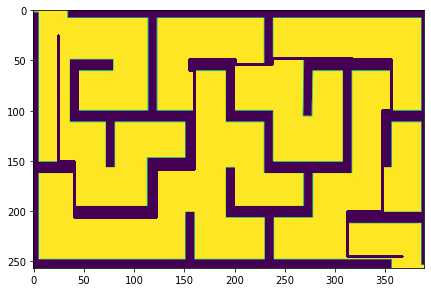

In [126]:
plt.figure(figsize = (7,7))
plt.imshow(maze2)
plt.show()

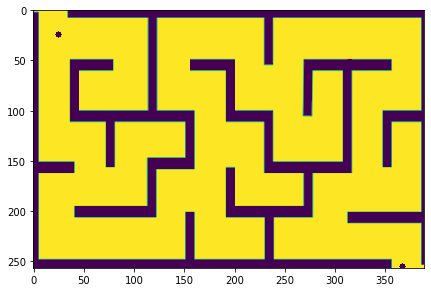

In [117]:
cv2.circle(maze2,(367,255), 3, (0,0,255), -1) # add a circle at (5, 220)
cv2.circle(maze2, (25,25), 3, (0,0,255), -1) # add a circle at (5,5)
plt.figure(figsize = (7,7))
plt.imshow(maze2)
plt.show()

In [101]:
maze_path = find_shortest_path_bfs(maze, 25, 25, 367, 257)

rows 300
cols 400
visiting 25 25
visiting 25 24
visiting 25 26
visiting 24 25
visiting 26 25
visiting 25 23
visiting 25 25
visiting 24 24
visiting 26 24
visiting 25 27
visiting 24 26
visiting 26 26
visiting 23 25
visiting 27 25
visiting 25 22
visiting 24 23
visiting 26 23
visiting 23 24
visiting 27 24
visiting 25 28
visiting 24 27
visiting 26 27
visiting 23 26
visiting 27 26
visiting 22 25
visiting 28 25
visiting 25 21
visiting 24 22
visiting 26 22
visiting 23 23
visiting 27 23
visiting 22 24
visiting 28 24
visiting 25 29
visiting 24 28
visiting 26 28
visiting 23 27
visiting 27 27
visiting 22 26
visiting 28 26
visiting 21 25
visiting 29 25
visiting 25 20
visiting 24 21
visiting 26 21
visiting 23 22
visiting 27 22
visiting 22 23
visiting 28 23
visiting 21 24
visiting 29 24
visiting 25 30
visiting 24 29
visiting 26 29
visiting 23 28
visiting 27 28
visiting 22 27
visiting 28 27
visiting 21 26
visiting 29 26
visiting 20 25
visiting 30 25
visiting 25 19
visiting 24 20
visiting 26 20
visitin

visiting 37 39
visiting 12 38
visiting 38 38
visiting 11 37
visiting 39 37
visiting 10 36
visiting 40 36
visiting 9 35
visiting 41 35
visiting 42 34
visiting 43 33
visiting 44 32
visiting 45 31
visiting 46 30
visiting 47 29
visiting 48 28
visiting 49 27
visiting 50 26
visiting 51 25
visiting 23 0
visiting 27 0
visiting 22 1
visiting 28 1
visiting 21 2
visiting 29 2
visiting 20 3
visiting 30 3
visiting 19 4
visiting 31 4
visiting 18 5
visiting 32 5
visiting 17 6
visiting 33 6
visiting 16 7
visiting 34 7
visiting 15 8
visiting 35 8
visiting 14 9
visiting 36 9
visiting 13 10
visiting 37 10
visiting 12 11
visiting 38 11
visiting 11 12
visiting 39 12
visiting 10 13
visiting 9 14
visiting 41 14
visiting 42 15
visiting 43 16
visiting 44 17
visiting 45 18
visiting 46 19
visiting 47 20
visiting 48 21
visiting 49 22
visiting 50 23
visiting 51 24
visiting 25 52
visiting 24 51
visiting 26 51
visiting 23 50
visiting 27 50
visiting 22 49
visiting 28 49
visiting 21 48
visiting 29 48
visiting 20 47
vi

visiting 13 52
visiting 37 52
visiting 12 51
visiting 38 51
visiting 11 50
visiting 39 50
visiting 10 49
visiting 40 49
visiting 9 48
visiting 41 48
visiting 42 47
visiting 43 46
visiting 44 45
visiting 45 44
visiting 46 43
visiting 47 42
visiting 48 41
visiting 49 40
visiting 50 39
visiting 51 38
visiting 52 37
visiting 53 36
visiting 54 35
visiting 55 34
visiting 56 33
visiting 57 32
visiting 58 31
visiting 59 30
visiting 60 29
visiting 61 28
visiting 62 27
visiting 63 26
visiting 64 25
visiting 10 0
visiting 40 0
visiting 9 1
visiting 41 1
visiting 8 2
visiting 42 2
visiting 7 3
visiting 43 3
visiting 6 4
visiting 5 5
visiting 4 6
visiting 3 7
visiting 2 8
visiting 1 9
visiting 54 14
visiting 55 15
visiting 56 16
visiting 57 17
visiting 58 18
visiting 59 19
visiting 60 20
visiting 61 21
visiting 62 22
visiting 63 23
visiting 64 24
visiting 25 65
visiting 24 64
visiting 26 64
visiting 23 63
visiting 27 63
visiting 22 62
visiting 28 62
visiting 21 61
visiting 29 61
visiting 20 60
visi

visiting 67 15
visiting 68 16
visiting 69 17
visiting 70 18
visiting 71 19
visiting 72 20
visiting 73 21
visiting 74 22
visiting 75 23
visiting 76 24
visiting 25 77
visiting 24 76
visiting 26 76
visiting 23 75
visiting 27 75
visiting 22 74
visiting 28 74
visiting 21 73
visiting 29 73
visiting 20 72
visiting 30 72
visiting 19 71
visiting 31 71
visiting 18 70
visiting 32 70
visiting 17 69
visiting 33 69
visiting 16 68
visiting 34 68
visiting 15 67
visiting 35 67
visiting 14 66
visiting 36 66
visiting 13 65
visiting 37 65
visiting 12 64
visiting 38 64
visiting 11 63
visiting 39 63
visiting 10 62
visiting 40 62
visiting 9 61
visiting 46 56
visiting 47 55
visiting 48 54
visiting 49 53
visiting 50 52
visiting 51 51
visiting 52 50
visiting 53 49
visiting 54 48
visiting 55 47
visiting 56 46
visiting 57 45
visiting 58 44
visiting 59 43
visiting 60 42
visiting 61 41
visiting 62 40
visiting 63 39
visiting 64 38
visiting 65 37
visiting 66 36
visiting 67 35
visiting 68 34
visiting 69 33
visiting 70

visiting 21 85
visiting 29 85
visiting 20 84
visiting 30 84
visiting 19 83
visiting 31 83
visiting 18 82
visiting 32 82
visiting 17 81
visiting 33 81
visiting 16 80
visiting 34 80
visiting 15 79
visiting 35 79
visiting 14 78
visiting 36 78
visiting 13 77
visiting 37 77
visiting 12 76
visiting 38 76
visiting 11 75
visiting 39 75
visiting 10 74
visiting 40 74
visiting 9 73
visiting 58 56
visiting 59 55
visiting 60 54
visiting 61 53
visiting 62 52
visiting 63 51
visiting 64 50
visiting 65 49
visiting 66 48
visiting 67 47
visiting 68 46
visiting 69 45
visiting 70 44
visiting 71 43
visiting 72 42
visiting 73 41
visiting 74 40
visiting 75 39
visiting 76 38
visiting 77 37
visiting 78 36
visiting 79 35
visiting 80 34
visiting 81 33
visiting 82 32
visiting 83 31
visiting 84 30
visiting 85 29
visiting 86 28
visiting 87 27
visiting 88 26
visiting 89 25
visiting 65 0
visiting 66 1
visiting 67 2
visiting 68 3
visiting 0 33
visiting 79 14
visiting 80 15
visiting 81 16
visiting 82 17
visiting 83 18
v

visiting 77 0
visiting 78 1
visiting 79 2
visiting 80 3
visiting 0 45
visiting 91 14
visiting 92 15
visiting 93 16
visiting 94 17
visiting 95 18
visiting 96 19
visiting 97 20
visiting 98 21
visiting 99 22
visiting 100 23
visiting 101 24
visiting 25 102
visiting 24 101
visiting 26 101
visiting 23 100
visiting 27 100
visiting 22 99
visiting 28 99
visiting 21 98
visiting 29 98
visiting 20 97
visiting 30 97
visiting 19 96
visiting 31 96
visiting 18 95
visiting 32 95
visiting 17 94
visiting 33 94
visiting 16 93
visiting 34 93
visiting 15 92
visiting 35 92
visiting 14 91
visiting 36 91
visiting 13 90
visiting 37 90
visiting 12 89
visiting 38 89
visiting 11 88
visiting 39 88
visiting 10 87
visiting 40 87
visiting 9 86
visiting 71 56
visiting 72 55
visiting 73 54
visiting 74 53
visiting 75 52
visiting 76 51
visiting 77 50
visiting 78 49
visiting 79 48
visiting 80 47
visiting 81 46
visiting 82 45
visiting 83 44
visiting 84 43
visiting 85 42
visiting 86 41
visiting 87 40
visiting 88 39
visiting 

visiting 108 18
visiting 109 19
visiting 110 20
visiting 111 21
visiting 112 22
visiting 113 23
visiting 114 24
visiting 25 115
visiting 24 114
visiting 26 114
visiting 23 113
visiting 27 113
visiting 22 112
visiting 28 112
visiting 21 111
visiting 29 111
visiting 20 110
visiting 30 110
visiting 19 109
visiting 31 109
visiting 18 108
visiting 32 108
visiting 17 107
visiting 33 107
visiting 16 106
visiting 34 106
visiting 15 105
visiting 35 105
visiting 14 104
visiting 36 104
visiting 13 103
visiting 37 103
visiting 12 102
visiting 38 102
visiting 11 101
visiting 39 101
visiting 10 100
visiting 40 100
visiting 9 99
visiting 84 56
visiting 85 55
visiting 86 54
visiting 87 53
visiting 88 52
visiting 89 51
visiting 90 50
visiting 91 49
visiting 92 48
visiting 93 47
visiting 94 46
visiting 95 45
visiting 96 44
visiting 97 43
visiting 98 42
visiting 99 41
visiting 100 40
visiting 101 39
visiting 102 38
visiting 103 37
visiting 104 36
visiting 105 35
visiting 106 34
visiting 107 33
visiting 1

visiting 113 39
visiting 114 38
visiting 115 37
visiting 116 36
visiting 117 35
visiting 118 34
visiting 103 0
visiting 104 1
visiting 105 2
visiting 106 3
visiting 0 71
visiting 117 14
visiting 118 15
visiting 25 128
visiting 24 127
visiting 26 127
visiting 23 126
visiting 27 126
visiting 22 125
visiting 28 125
visiting 21 124
visiting 29 124
visiting 20 123
visiting 30 123
visiting 19 122
visiting 31 122
visiting 18 121
visiting 32 121
visiting 17 120
visiting 33 120
visiting 16 119
visiting 34 119
visiting 15 118
visiting 35 118
visiting 14 117
visiting 36 117
visiting 13 116
visiting 37 116
visiting 12 115
visiting 38 115
visiting 11 114
visiting 39 114
visiting 10 113
visiting 40 113
visiting 9 112
visiting 84 69
visiting 83 68
visiting 85 68
visiting 82 67
visiting 86 67
visiting 87 66
visiting 88 65
visiting 89 64
visiting 90 63
visiting 91 62
visiting 92 61
visiting 93 60
visiting 94 59
visiting 95 58
visiting 96 57
visiting 97 56
visiting 98 55
visiting 99 54
visiting 100 53
v

visiting 104 60
visiting 105 59
visiting 106 58
visiting 107 57
visiting 108 56
visiting 109 55
visiting 110 54
visiting 111 53
visiting 112 52
visiting 113 51
visiting 114 50
visiting 115 49
visiting 116 48
visiting 117 47
visiting 118 46
visiting 115 0
visiting 116 1
visiting 117 2
visiting 118 3
visiting 0 83
visiting 25 140
visiting 24 139
visiting 26 139
visiting 23 138
visiting 27 138
visiting 22 137
visiting 28 137
visiting 21 136
visiting 29 136
visiting 20 135
visiting 30 135
visiting 19 134
visiting 31 134
visiting 18 133
visiting 32 133
visiting 17 132
visiting 33 132
visiting 16 131
visiting 34 131
visiting 15 130
visiting 35 130
visiting 14 129
visiting 36 129
visiting 13 128
visiting 37 128
visiting 12 127
visiting 38 127
visiting 11 126
visiting 39 126
visiting 10 125
visiting 40 125
visiting 9 124
visiting 41 124
visiting 42 123
visiting 43 122
visiting 44 121
visiting 45 120
visiting 46 119
visiting 47 118
visiting 48 117
visiting 84 81
visiting 83 80
visiting 85 80
vi

visiting 15 140
visiting 35 140
visiting 14 139
visiting 36 139
visiting 13 138
visiting 37 138
visiting 12 137
visiting 38 137
visiting 11 136
visiting 39 136
visiting 10 135
visiting 40 135
visiting 9 134
visiting 41 134
visiting 42 133
visiting 43 132
visiting 44 131
visiting 45 130
visiting 46 129
visiting 47 128
visiting 48 127
visiting 49 126
visiting 50 125
visiting 51 124
visiting 52 123
visiting 53 122
visiting 54 121
visiting 55 120
visiting 56 119
visiting 57 118
visiting 58 117
visiting 84 91
visiting 83 90
visiting 85 90
visiting 82 89
visiting 86 89
visiting 81 88
visiting 87 88
visiting 80 87
visiting 88 87
visiting 79 86
visiting 89 86
visiting 78 85
visiting 90 85
visiting 77 84
visiting 91 84
visiting 76 83
visiting 92 83
visiting 75 82
visiting 93 82
visiting 74 81
visiting 94 81
visiting 73 80
visiting 95 80
visiting 72 79
visiting 96 79
visiting 71 78
visiting 97 78
visiting 70 77
visiting 98 77
visiting 69 76
visiting 99 76
visiting 68 75
visiting 100 75
visiting 

visiting 60 75
visiting 108 75
visiting 59 74
visiting 109 74
visiting 58 73
visiting 110 73
visiting 57 72
visiting 111 72
visiting 56 71
visiting 112 71
visiting 55 70
visiting 113 70
visiting 54 69
visiting 114 69
visiting 53 68
visiting 115 68
visiting 52 67
visiting 116 67
visiting 117 66
visiting 118 65
visiting 134 0
visiting 135 1
visiting 136 2
visiting 137 3
visiting 0 102
visiting 23 157
visiting 27 157
visiting 22 156
visiting 28 156
visiting 21 155
visiting 29 155
visiting 20 154
visiting 30 154
visiting 19 153
visiting 31 153
visiting 18 152
visiting 32 152
visiting 17 151
visiting 33 151
visiting 16 150
visiting 34 150
visiting 15 149
visiting 35 149
visiting 14 148
visiting 36 148
visiting 13 147
visiting 37 147
visiting 12 146
visiting 38 146
visiting 11 145
visiting 39 145
visiting 10 144
visiting 40 144
visiting 9 143
visiting 41 143
visiting 42 142
visiting 43 141
visiting 44 140
visiting 45 139
visiting 46 138
visiting 47 137
visiting 48 136
visiting 49 135
visitin

visiting 88 105
visiting 79 104
visiting 89 104
visiting 78 103
visiting 90 103
visiting 77 102
visiting 91 102
visiting 76 101
visiting 92 101
visiting 75 100
visiting 93 100
visiting 74 99
visiting 94 99
visiting 73 98
visiting 95 98
visiting 72 97
visiting 96 97
visiting 71 96
visiting 97 96
visiting 70 95
visiting 98 95
visiting 69 94
visiting 99 94
visiting 68 93
visiting 100 93
visiting 67 92
visiting 101 92
visiting 66 91
visiting 102 91
visiting 65 90
visiting 103 90
visiting 64 89
visiting 104 89
visiting 63 88
visiting 105 88
visiting 62 87
visiting 106 87
visiting 61 86
visiting 107 86
visiting 60 85
visiting 108 85
visiting 59 84
visiting 109 84
visiting 58 83
visiting 110 83
visiting 57 82
visiting 111 82
visiting 56 81
visiting 112 81
visiting 55 80
visiting 113 80
visiting 54 79
visiting 114 79
visiting 53 78
visiting 115 78
visiting 52 77
visiting 116 77
visiting 51 76
visiting 117 76
visiting 50 75
visiting 118 75
visiting 144 0
visiting 145 1
visiting 146 2
visiting 1

visiting 59 148
visiting 60 147
visiting 61 146
visiting 62 145
visiting 63 144
visiting 64 143
visiting 65 142
visiting 66 141
visiting 67 140
visiting 68 139
visiting 69 138
visiting 70 137
visiting 71 136
visiting 72 135
visiting 73 134
visiting 74 133
visiting 75 132
visiting 76 131
visiting 67 106
visiting 101 106
visiting 66 105
visiting 102 105
visiting 65 104
visiting 103 104
visiting 64 103
visiting 104 103
visiting 63 102
visiting 105 102
visiting 62 101
visiting 106 101
visiting 61 100
visiting 107 100
visiting 60 99
visiting 108 99
visiting 59 98
visiting 109 98
visiting 58 97
visiting 110 97
visiting 57 96
visiting 111 96
visiting 56 95
visiting 112 95
visiting 55 94
visiting 113 94
visiting 54 93
visiting 114 93
visiting 53 92
visiting 115 92
visiting 52 91
visiting 116 91
visiting 51 90
visiting 117 90
visiting 50 89
visiting 118 89
visiting 158 0
visiting 159 1
visiting 160 2
visiting 161 3
visiting 0 126
visiting 45 163
visiting 46 162
visiting 47 161
visiting 48 160
v

visiting 56 169
visiting 57 168
visiting 58 167
visiting 59 166
visiting 60 165
visiting 61 164
visiting 62 163
visiting 63 162
visiting 64 161
visiting 65 160
visiting 66 159
visiting 67 158
visiting 68 157
visiting 69 156
visiting 70 155
visiting 71 154
visiting 72 153
visiting 73 152
visiting 74 151
visiting 75 150
visiting 76 149
visiting 176 0
visiting 177 1
visiting 178 2
visiting 179 3
visiting 0 144
visiting 45 181
visiting 44 180
visiting 46 180
visiting 43 179
visiting 47 179
visiting 42 178
visiting 48 178
visiting 41 177
visiting 49 177
visiting 40 176
visiting 50 176
visiting 39 175
visiting 51 175
visiting 38 174
visiting 52 174
visiting 37 173
visiting 53 173
visiting 36 172
visiting 54 172
visiting 35 171
visiting 55 171
visiting 34 170
visiting 56 170
visiting 33 169
visiting 57 169
visiting 58 168
visiting 59 167
visiting 60 166
visiting 61 165
visiting 62 164
visiting 63 163
visiting 64 162
visiting 65 161
visiting 66 160
visiting 67 159
visiting 68 158
visiting 69 1

visiting 57 188
visiting 32 187
visiting 58 187
visiting 31 186
visiting 59 186
visiting 30 185
visiting 60 185
visiting 29 184
visiting 61 184
visiting 28 183
visiting 62 183
visiting 27 182
visiting 63 182
visiting 26 181
visiting 64 181
visiting 25 180
visiting 65 180
visiting 24 179
visiting 66 179
visiting 23 178
visiting 67 178
visiting 22 177
visiting 68 177
visiting 21 176
visiting 69 176
visiting 20 175
visiting 70 175
visiting 19 174
visiting 71 174
visiting 18 173
visiting 72 173
visiting 17 172
visiting 73 172
visiting 16 171
visiting 74 171
visiting 15 170
visiting 75 170
visiting 14 169
visiting 76 169
visiting 77 168
visiting 78 167
visiting 79 166
visiting 80 165
visiting 81 164
visiting 82 163
visiting 196 0
visiting 197 1
visiting 198 2
visiting 199 3
visiting 0 164
visiting 45 201
visiting 44 200
visiting 46 200
visiting 43 199
visiting 47 199
visiting 42 198
visiting 48 198
visiting 41 197
visiting 49 197
visiting 40 196
visiting 50 196
visiting 39 195
visiting 51 1

visiting 49 212
visiting 40 211
visiting 39 210
visiting 38 209
visiting 37 208
visiting 36 207
visiting 35 206
visiting 34 205
visiting 33 204
visiting 32 203
visiting 31 202
visiting 30 201
visiting 29 200
visiting 61 200
visiting 28 199
visiting 62 199
visiting 27 198
visiting 63 198
visiting 26 197
visiting 64 197
visiting 25 196
visiting 65 196
visiting 24 195
visiting 66 195
visiting 23 194
visiting 67 194
visiting 22 193
visiting 68 193
visiting 21 192
visiting 69 192
visiting 20 191
visiting 70 191
visiting 19 190
visiting 71 190
visiting 18 189
visiting 72 189
visiting 17 188
visiting 73 188
visiting 16 187
visiting 74 187
visiting 15 186
visiting 75 186
visiting 14 185
visiting 76 185
visiting 13 184
visiting 77 184
visiting 12 183
visiting 78 183
visiting 11 182
visiting 79 182
visiting 10 181
visiting 80 181
visiting 9 180
visiting 81 180
visiting 82 179
visiting 83 178
visiting 84 177
visiting 85 176
visiting 86 175
visiting 87 174
visiting 88 173
visiting 89 172
visiting 

visiting 225 3
visiting 0 190
visiting 45 227
visiting 44 226
visiting 46 226
visiting 43 225
visiting 47 225
visiting 42 224
visiting 48 224
visiting 41 223
visiting 49 223
visiting 40 222
visiting 50 222
visiting 39 221
visiting 51 221
visiting 38 220
visiting 52 220
visiting 37 219
visiting 53 219
visiting 36 218
visiting 54 218
visiting 35 217
visiting 55 217
visiting 34 216
visiting 56 216
visiting 33 215
visiting 57 215
visiting 32 214
visiting 58 214
visiting 31 213
visiting 59 213
visiting 30 212
visiting 60 212
visiting 29 211
visiting 28 210
visiting 27 209
visiting 26 208
visiting 25 207
visiting 24 206
visiting 23 205
visiting 22 204
visiting 21 203
visiting 20 202
visiting 19 201
visiting 18 200
visiting 72 200
visiting 17 199
visiting 73 199
visiting 16 198
visiting 74 198
visiting 15 197
visiting 75 197
visiting 14 196
visiting 76 196
visiting 13 195
visiting 77 195
visiting 12 194
visiting 78 194
visiting 11 193
visiting 79 193
visiting 10 192
visiting 80 192
visiting 9

visiting 97 182
visiting 98 181
visiting 99 180
visiting 100 179
visiting 101 178
visiting 102 177
visiting 103 176
visiting 104 175
visiting 105 174
visiting 106 173
visiting 107 172
visiting 108 171
visiting 109 170
visiting 110 169
visiting 111 168
visiting 112 167
visiting 113 166
visiting 114 165
visiting 115 164
visiting 85 132
visiting 86 133
visiting 87 134
visiting 88 135
visiting 89 136
visiting 90 137
visiting 91 138
visiting 92 139
visiting 93 140
visiting 94 141
visiting 95 142
visiting 96 143
visiting 97 144
visiting 98 145
visiting 99 146
visiting 100 147
visiting 101 148
visiting 102 149
visiting 103 150
visiting 104 151
visiting 105 152
visiting 106 153
visiting 107 154
visiting 108 155
visiting 109 156
visiting 110 157
visiting 111 158
visiting 112 159
visiting 113 160
visiting 114 161
visiting 115 162
visiting 116 163
visiting 230 0
visiting 231 1
visiting 232 2
visiting 233 3
visiting 0 198
visiting 45 235
visiting 44 234
visiting 46 234
visiting 43 233
visiting 47 

visiting 62 223
visiting 27 222
visiting 63 222
visiting 26 221
visiting 64 221
visiting 25 220
visiting 65 220
visiting 24 219
visiting 66 219
visiting 23 218
visiting 67 218
visiting 22 217
visiting 68 217
visiting 21 216
visiting 69 216
visiting 20 215
visiting 70 215
visiting 19 214
visiting 71 214
visiting 18 213
visiting 72 213
visiting 17 212
visiting 73 212
visiting 16 211
visiting 15 210
visiting 14 209
visiting 13 208
visiting 12 207
visiting 11 206
visiting 10 205
visiting 9 204
visiting 85 200
visiting 86 199
visiting 87 198
visiting 88 197
visiting 89 196
visiting 90 195
visiting 91 194
visiting 92 193
visiting 93 192
visiting 94 191
visiting 95 190
visiting 96 189
visiting 97 188
visiting 98 187
visiting 99 186
visiting 100 185
visiting 101 184
visiting 102 183
visiting 103 182
visiting 104 181
visiting 105 180
visiting 106 179
visiting 107 178
visiting 108 177
visiting 109 176
visiting 110 175
visiting 111 174
visiting 112 173
visiting 113 172
visiting 114 171
visiting 1

visiting 26 231
visiting 64 231
visiting 25 230
visiting 65 230
visiting 24 229
visiting 66 229
visiting 23 228
visiting 67 228
visiting 22 227
visiting 68 227
visiting 21 226
visiting 69 226
visiting 20 225
visiting 70 225
visiting 19 224
visiting 71 224
visiting 18 223
visiting 72 223
visiting 17 222
visiting 73 222
visiting 16 221
visiting 74 221
visiting 15 220
visiting 75 220
visiting 14 219
visiting 76 219
visiting 13 218
visiting 77 218
visiting 12 217
visiting 78 217
visiting 11 216
visiting 79 216
visiting 10 215
visiting 80 215
visiting 9 214
visiting 81 214
visiting 82 213
visiting 83 212
visiting 95 200
visiting 96 199
visiting 97 198
visiting 98 197
visiting 99 196
visiting 100 195
visiting 101 194
visiting 102 193
visiting 103 192
visiting 104 191
visiting 105 190
visiting 106 189
visiting 107 188
visiting 108 187
visiting 109 186
visiting 110 185
visiting 111 184
visiting 112 183
visiting 113 182
visiting 114 181
visiting 115 180
visiting 116 179
visiting 117 178
visitin

visiting 254 1
visiting 255 2
visiting 256 3
visiting 0 221
visiting 41 254
visiting 49 254
visiting 40 253
visiting 50 253
visiting 39 252
visiting 51 252
visiting 38 251
visiting 52 251
visiting 37 250
visiting 53 250
visiting 36 249
visiting 54 249
visiting 35 248
visiting 55 248
visiting 34 247
visiting 56 247
visiting 33 246
visiting 57 246
visiting 32 245
visiting 58 245
visiting 31 244
visiting 59 244
visiting 30 243
visiting 60 243
visiting 29 242
visiting 61 242
visiting 28 241
visiting 62 241
visiting 27 240
visiting 63 240
visiting 26 239
visiting 64 239
visiting 25 238
visiting 65 238
visiting 24 237
visiting 66 237
visiting 23 236
visiting 67 236
visiting 22 235
visiting 68 235
visiting 21 234
visiting 69 234
visiting 20 233
visiting 70 233
visiting 19 232
visiting 71 232
visiting 18 231
visiting 72 231
visiting 17 230
visiting 73 230
visiting 16 229
visiting 74 229
visiting 15 228
visiting 75 228
visiting 14 227
visiting 76 227
visiting 13 226
visiting 77 226
visiting 12 

visiting 76 236
visiting 13 235
visiting 77 235
visiting 12 234
visiting 78 234
visiting 11 233
visiting 79 233
visiting 10 232
visiting 80 232
visiting 9 231
visiting 81 231
visiting 82 230
visiting 83 229
visiting 84 228
visiting 85 227
visiting 86 226
visiting 87 225
visiting 88 224
visiting 89 223
visiting 90 222
visiting 91 221
visiting 92 220
visiting 93 219
visiting 94 218
visiting 95 217
visiting 96 216
visiting 97 215
visiting 98 214
visiting 99 213
visiting 100 212
visiting 112 200
visiting 113 199
visiting 114 198
visiting 115 197
visiting 116 196
visiting 117 195
visiting 103 117
visiting 104 118
visiting 105 119
visiting 106 120
visiting 107 121
visiting 108 122
visiting 109 123
visiting 110 124
visiting 111 125
visiting 112 126
visiting 113 127
visiting 114 128
visiting 115 129
visiting 116 130
visiting 117 131
visiting 118 132
visiting 119 133
visiting 120 134
visiting 121 135
visiting 122 136
visiting 123 137
visiting 124 138
visiting 125 139
visiting 126 140
visiting 1

visiting 95 228
visiting 96 227
visiting 97 226
visiting 98 225
visiting 99 224
visiting 100 223
visiting 101 222
visiting 102 221
visiting 103 220
visiting 104 219
visiting 105 218
visiting 106 217
visiting 107 216
visiting 108 215
visiting 109 214
visiting 110 213
visiting 111 212
visiting 114 117
visiting 115 118
visiting 116 119
visiting 117 120
visiting 118 121
visiting 119 122
visiting 120 123
visiting 121 124
visiting 122 125
visiting 123 126
visiting 124 127
visiting 125 128
visiting 126 129
visiting 127 130
visiting 128 131
visiting 129 132
visiting 130 133
visiting 131 134
visiting 132 135
visiting 133 136
visiting 134 137
visiting 135 138
visiting 136 139
visiting 137 140
visiting 138 141
visiting 139 142
visiting 140 143
visiting 141 144
visiting 142 145
visiting 143 146
visiting 144 147
visiting 145 148
visiting 146 149
visiting 147 150
visiting 148 151
visiting 149 152
visiting 150 153
visiting 274 0
visiting 275 1
visiting 276 2
visiting 277 3
visiting 0 242
visiting 20 

visiting 137 125
visiting 138 126
visiting 139 127
visiting 140 128
visiting 141 129
visiting 142 130
visiting 143 131
visiting 144 132
visiting 145 133
visiting 146 134
visiting 147 135
visiting 148 136
visiting 149 137
visiting 150 138
visiting 151 139
visiting 152 140
visiting 153 141
visiting 154 142
visiting 155 143
visiting 289 0
visiting 290 1
visiting 291 2
visiting 292 3
visiting 0 257
visiting 85 254
visiting 86 253
visiting 87 252
visiting 88 251
visiting 89 250
visiting 90 249
visiting 91 248
visiting 92 247
visiting 93 246
visiting 94 245
visiting 95 244
visiting 96 243
visiting 97 242
visiting 98 241
visiting 99 240
visiting 100 239
visiting 101 238
visiting 102 237
visiting 103 236
visiting 104 235
visiting 105 234
visiting 106 233
visiting 107 232
visiting 108 231
visiting 109 230
visiting 110 229
visiting 111 228
visiting 112 227
visiting 113 226
visiting 114 225
visiting 115 224
visiting 116 223
visiting 117 222
visiting 118 221
visiting 119 220
visiting 120 219
visit

visiting 4 267
visiting 5 266
visiting 6 265
visiting 99 254
visiting 100 253
visiting 101 252
visiting 102 251
visiting 103 250
visiting 104 249
visiting 105 248
visiting 106 247
visiting 107 246
visiting 108 245
visiting 109 244
visiting 110 243
visiting 111 242
visiting 112 241
visiting 113 240
visiting 114 239
visiting 115 238
visiting 116 237
visiting 117 236
visiting 118 235
visiting 119 234
visiting 120 233
visiting 121 232
visiting 122 231
visiting 123 230
visiting 124 229
visiting 125 228
visiting 126 227
visiting 127 226
visiting 128 225
visiting 129 224
visiting 130 223
visiting 131 222
visiting 132 221
visiting 133 220
visiting 134 219
visiting 135 218
visiting 136 217
visiting 137 216
visiting 138 215
visiting 139 214
visiting 140 213
visiting 126 197
visiting 125 198
visiting 127 198
visiting 128 199
visiting 129 200
visiting 130 201
visiting 131 202
visiting 132 203
visiting 133 204
visiting 134 205
visiting 135 206
visiting 136 207
visiting 137 208
visiting 138 209
visi

visiting 152 210
visiting 153 211
visiting 154 212
visiting 317 0
visiting 318 1
visiting 319 2
visiting 320 3
visiting 0 285
visiting 1 284
visiting 2 283
visiting 3 282
visiting 4 281
visiting 5 280
visiting 6 279
visiting 7 278
visiting 8 277
visiting 9 276
visiting 10 275
visiting 11 274
visiting 12 273
visiting 13 272
visiting 14 271
visiting 15 270
visiting 16 269
visiting 17 268
visiting 18 267
visiting 19 266
visiting 20 265
visiting 113 254
visiting 114 253
visiting 115 252
visiting 116 251
visiting 117 250
visiting 118 249
visiting 119 248
visiting 120 247
visiting 121 246
visiting 122 245
visiting 123 244
visiting 124 243
visiting 125 242
visiting 126 241
visiting 127 240
visiting 128 239
visiting 129 238
visiting 130 237
visiting 131 236
visiting 132 235
visiting 133 234
visiting 134 233
visiting 135 232
visiting 136 231
visiting 137 230
visiting 138 229
visiting 139 228
visiting 140 227
visiting 141 226
visiting 142 225
visiting 143 224
visiting 144 223
visiting 145 222
vi

visiting 3 294
visiting 4 293
visiting 5 292
visiting 6 291
visiting 7 290
visiting 8 289
visiting 9 288
visiting 10 287
visiting 11 286
visiting 12 285
visiting 13 284
visiting 14 283
visiting 15 282
visiting 16 281
visiting 17 280
visiting 18 279
visiting 19 278
visiting 20 277
visiting 21 276
visiting 22 275
visiting 23 274
visiting 24 273
visiting 25 272
visiting 26 271
visiting 27 270
visiting 28 269
visiting 29 268
visiting 30 267
visiting 31 266
visiting 32 265
visiting 125 254
visiting 126 253
visiting 127 252
visiting 128 251
visiting 129 250
visiting 130 249
visiting 131 248
visiting 132 247
visiting 133 246
visiting 134 245
visiting 135 244
visiting 136 243
visiting 137 242
visiting 138 241
visiting 139 240
visiting 140 239
visiting 141 238
visiting 142 237
visiting 143 236
visiting 144 235
visiting 145 234
visiting 146 233
visiting 147 232
visiting 148 231
visiting 149 230
visiting 150 229
visiting 151 228
visiting 152 227
visiting 153 226
visiting 154 225
visiting 155 224


visiting 169 209
visiting 170 208
visiting 171 207
visiting 172 206
visiting 341 0
visiting 342 1
visiting 343 2
visiting 344 3
visiting 10 299
visiting 11 298
visiting 12 297
visiting 13 296
visiting 14 295
visiting 15 294
visiting 16 293
visiting 17 292
visiting 18 291
visiting 19 290
visiting 20 289
visiting 21 288
visiting 22 287
visiting 23 286
visiting 24 285
visiting 25 284
visiting 26 283
visiting 27 282
visiting 28 281
visiting 29 280
visiting 30 279
visiting 31 278
visiting 32 277
visiting 33 276
visiting 34 275
visiting 35 274
visiting 36 273
visiting 37 272
visiting 38 271
visiting 39 270
visiting 40 269
visiting 41 268
visiting 42 267
visiting 43 266
visiting 44 265
visiting 137 254
visiting 138 253
visiting 139 252
visiting 140 251
visiting 141 250
visiting 142 249
visiting 143 248
visiting 144 247
visiting 145 246
visiting 146 245
visiting 147 244
visiting 148 243
visiting 149 242
visiting 150 241
visiting 151 240
visiting 152 239
visiting 153 238
visiting 154 237
visiti

visiting 25 293
visiting 26 292
visiting 27 291
visiting 28 290
visiting 29 289
visiting 30 288
visiting 31 287
visiting 32 286
visiting 33 285
visiting 34 284
visiting 35 283
visiting 36 282
visiting 37 281
visiting 38 280
visiting 39 279
visiting 40 278
visiting 41 277
visiting 42 276
visiting 43 275
visiting 44 274
visiting 45 273
visiting 46 272
visiting 47 271
visiting 48 270
visiting 49 269
visiting 50 268
visiting 51 267
visiting 52 266
visiting 53 265
visiting 146 254
visiting 147 253
visiting 148 252
visiting 149 251
visiting 150 250
visiting 151 249
visiting 152 248
visiting 153 247
visiting 154 246
visiting 155 245
visiting 141 165
visiting 142 166
visiting 143 167
visiting 144 168
visiting 145 169
visiting 146 170
visiting 147 171
visiting 148 172
visiting 149 173
visiting 150 174
visiting 151 175
visiting 152 176
visiting 153 177
visiting 154 178
visiting 155 179
visiting 156 180
visiting 157 181
visiting 158 182
visiting 159 183
visiting 160 184
visiting 161 185
visiting 

visiting 189 208
visiting 190 207
visiting 191 206
visiting 360 0
visiting 361 1
visiting 362 2
visiting 363 3
visiting 29 299
visiting 30 298
visiting 31 297
visiting 32 296
visiting 33 295
visiting 34 294
visiting 35 293
visiting 36 292
visiting 37 291
visiting 38 290
visiting 39 289
visiting 40 288
visiting 41 287
visiting 42 286
visiting 43 285
visiting 44 284
visiting 45 283
visiting 46 282
visiting 47 281
visiting 48 280
visiting 49 279
visiting 50 278
visiting 51 277
visiting 52 276
visiting 53 275
visiting 54 274
visiting 55 273
visiting 56 272
visiting 57 271
visiting 58 270
visiting 59 269
visiting 60 268
visiting 61 267
visiting 62 266
visiting 63 265
visiting 151 165
visiting 152 166
visiting 153 167
visiting 154 168
visiting 155 169
visiting 156 170
visiting 157 171
visiting 158 172
visiting 159 173
visiting 160 174
visiting 161 175
visiting 162 176
visiting 163 177
visiting 164 178
visiting 165 179
visiting 166 180
visiting 167 181
visiting 168 182
visiting 169 183
visiti

visiting 183 223
visiting 184 222
visiting 185 221
visiting 186 220
visiting 187 219
visiting 188 218
visiting 189 217
visiting 190 216
visiting 191 215
visiting 192 214
visiting 193 213
visiting 194 212
visiting 195 211
visiting 369 0
visiting 370 1
visiting 371 2
visiting 372 3
visiting 38 299
visiting 39 298
visiting 40 297
visiting 41 296
visiting 42 295
visiting 43 294
visiting 44 293
visiting 45 292
visiting 46 291
visiting 47 290
visiting 48 289
visiting 49 288
visiting 50 287
visiting 51 286
visiting 52 285
visiting 53 284
visiting 54 283
visiting 55 282
visiting 56 281
visiting 57 280
visiting 58 279
visiting 59 278
visiting 60 277
visiting 61 276
visiting 62 275
visiting 63 274
visiting 64 273
visiting 65 272
visiting 66 271
visiting 67 270
visiting 68 269
visiting 69 268
visiting 70 267
visiting 71 266
visiting 72 265
visiting 160 165
visiting 161 166
visiting 162 167
visiting 163 168
visiting 164 169
visiting 165 170
visiting 166 171
visiting 167 172
visiting 168 173
visiti

visiting 80 267
visiting 81 266
visiting 82 265
visiting 164 159
visiting 165 160
visiting 166 161
visiting 167 162
visiting 168 163
visiting 169 164
visiting 170 165
visiting 171 166
visiting 172 167
visiting 173 168
visiting 174 169
visiting 175 170
visiting 176 171
visiting 177 172
visiting 178 173
visiting 179 174
visiting 180 175
visiting 181 176
visiting 182 177
visiting 183 178
visiting 184 179
visiting 185 180
visiting 186 181
visiting 187 182
visiting 188 183
visiting 189 184
visiting 190 185
visiting 191 186
visiting 192 187
visiting 193 188
visiting 194 189
visiting 195 190
visiting 164 253
visiting 165 252
visiting 166 251
visiting 167 250
visiting 168 249
visiting 169 248
visiting 170 247
visiting 171 246
visiting 172 245
visiting 173 244
visiting 174 243
visiting 175 242
visiting 176 241
visiting 177 240
visiting 178 239
visiting 179 238
visiting 180 237
visiting 181 236
visiting 182 235
visiting 183 234
visiting 184 233
visiting 185 232
visiting 186 231
visiting 187 230


visiting 189 173
visiting 190 174
visiting 191 175
visiting 192 176
visiting 193 177
visiting 194 178
visiting 195 179
visiting 174 254
visiting 175 253
visiting 176 252
visiting 177 251
visiting 178 250
visiting 179 249
visiting 180 248
visiting 181 247
visiting 182 246
visiting 183 245
visiting 184 244
visiting 185 243
visiting 186 242
visiting 187 241
visiting 188 240
visiting 189 239
visiting 190 238
visiting 191 237
visiting 192 236
visiting 193 235
visiting 194 234
visiting 195 233
visiting 196 232
visiting 197 231
visiting 198 230
visiting 199 229
visiting 200 228
visiting 201 227
visiting 202 226
visiting 203 225
visiting 204 224
visiting 205 223
visiting 206 222
visiting 207 221
visiting 208 220
visiting 209 219
visiting 210 218
visiting 211 217
visiting 212 216
visiting 213 215
visiting 214 214
visiting 215 213
visiting 216 212
visiting 391 0
visiting 392 1
visiting 393 2
visiting 394 3
visiting 60 299
visiting 61 298
visiting 62 297
visiting 63 296
visiting 64 295
visiting 6

visiting 192 245
visiting 193 244
visiting 194 243
visiting 195 242
visiting 196 241
visiting 197 240
visiting 198 239
visiting 199 238
visiting 200 237
visiting 201 236
visiting 202 235
visiting 203 234
visiting 204 233
visiting 205 232
visiting 206 231
visiting 207 230
visiting 208 229
visiting 209 228
visiting 210 227
visiting 211 226
visiting 212 225
visiting 213 224
visiting 214 223
visiting 215 222
visiting 216 221
visiting 217 220
visiting 218 219
visiting 219 218
visiting 220 217
visiting 221 216
visiting 222 215
visiting 223 214
visiting 224 213
visiting 225 212
visiting 399 7
visiting 69 299
visiting 70 298
visiting 71 297
visiting 72 296
visiting 73 295
visiting 74 294
visiting 75 293
visiting 76 292
visiting 77 291
visiting 78 290
visiting 79 289
visiting 80 288
visiting 81 287
visiting 82 286
visiting 83 285
visiting 84 284
visiting 85 283
visiting 86 282
visiting 87 281
visiting 88 280
visiting 89 279
visiting 90 278
visiting 91 277
visiting 92 276
visiting 93 275
visitin

visiting 87 291
visiting 88 290
visiting 89 289
visiting 90 288
visiting 91 287
visiting 92 286
visiting 93 285
visiting 94 284
visiting 95 283
visiting 96 282
visiting 97 281
visiting 98 280
visiting 99 279
visiting 100 278
visiting 101 277
visiting 102 276
visiting 103 275
visiting 104 274
visiting 105 273
visiting 106 272
visiting 107 271
visiting 108 270
visiting 109 269
visiting 110 268
visiting 111 267
visiting 112 266
visiting 113 265
visiting 164 128
visiting 165 129
visiting 166 130
visiting 167 131
visiting 168 132
visiting 169 133
visiting 170 134
visiting 171 135
visiting 172 136
visiting 173 137
visiting 174 138
visiting 175 139
visiting 176 140
visiting 177 141
visiting 178 142
visiting 179 143
visiting 180 144
visiting 181 145
visiting 182 146
visiting 183 147
visiting 184 148
visiting 185 149
visiting 186 150
visiting 187 151
visiting 188 152
visiting 189 153
visiting 190 154
visiting 191 155
visiting 192 156
visiting 193 157
visiting 194 158
visiting 195 159
visiting 1

visiting 231 225
visiting 232 224
visiting 233 223
visiting 234 222
visiting 399 26
visiting 88 299
visiting 89 298
visiting 90 297
visiting 91 296
visiting 92 295
visiting 93 294
visiting 94 293
visiting 95 292
visiting 96 291
visiting 97 290
visiting 98 289
visiting 99 288
visiting 100 287
visiting 101 286
visiting 102 285
visiting 103 284
visiting 104 283
visiting 105 282
visiting 106 281
visiting 107 280
visiting 108 279
visiting 109 278
visiting 110 277
visiting 111 276
visiting 112 275
visiting 113 274
visiting 114 273
visiting 115 272
visiting 116 271
visiting 117 270
visiting 118 269
visiting 119 268
visiting 120 267
visiting 121 266
visiting 122 265
visiting 164 119
visiting 165 120
visiting 166 121
visiting 167 122
visiting 168 123
visiting 169 124
visiting 170 125
visiting 171 126
visiting 172 127
visiting 173 128
visiting 174 129
visiting 175 130
visiting 176 131
visiting 177 132
visiting 178 133
visiting 179 134
visiting 180 135
visiting 181 136
visiting 182 137
visiting 1

visiting 109 287
visiting 110 286
visiting 111 285
visiting 112 284
visiting 113 283
visiting 114 282
visiting 115 281
visiting 116 280
visiting 117 279
visiting 118 278
visiting 119 277
visiting 120 276
visiting 121 275
visiting 122 274
visiting 123 273
visiting 124 272
visiting 125 271
visiting 126 270
visiting 127 269
visiting 128 268
visiting 129 267
visiting 130 266
visiting 131 265
visiting 164 110
visiting 165 111
visiting 166 112
visiting 167 113
visiting 168 114
visiting 169 115
visiting 170 116
visiting 171 117
visiting 172 118
visiting 173 119
visiting 174 120
visiting 175 121
visiting 176 122
visiting 177 123
visiting 178 124
visiting 179 125
visiting 180 126
visiting 181 127
visiting 182 128
visiting 183 129
visiting 184 130
visiting 185 131
visiting 186 132
visiting 187 133
visiting 188 134
visiting 189 135
visiting 190 136
visiting 191 137
visiting 192 138
visiting 193 139
visiting 194 140
visiting 195 141
visiting 196 142
visiting 197 143
visiting 198 144
visiting 199 1

visiting 217 171
visiting 218 170
visiting 219 169
visiting 220 168
visiting 221 167
visiting 222 166
visiting 223 165
visiting 224 164
visiting 225 163
visiting 220 254
visiting 221 253
visiting 222 252
visiting 223 251
visiting 224 250
visiting 225 249
visiting 226 248
visiting 227 247
visiting 228 246
visiting 229 245
visiting 230 244
visiting 231 243
visiting 232 242
visiting 233 241
visiting 234 240
visiting 399 44
visiting 106 299
visiting 107 298
visiting 108 297
visiting 109 296
visiting 110 295
visiting 111 294
visiting 112 293
visiting 113 292
visiting 114 291
visiting 115 290
visiting 116 289
visiting 117 288
visiting 118 287
visiting 119 286
visiting 120 285
visiting 121 284
visiting 122 283
visiting 123 282
visiting 124 281
visiting 125 280
visiting 126 279
visiting 127 278
visiting 128 277
visiting 129 276
visiting 130 275
visiting 131 274
visiting 132 273
visiting 133 272
visiting 134 271
visiting 135 270
visiting 136 269
visiting 137 268
visiting 138 267
visiting 139 26

visiting 180 109
visiting 181 110
visiting 182 111
visiting 183 112
visiting 184 113
visiting 185 114
visiting 186 115
visiting 187 116
visiting 188 117
visiting 189 118
visiting 190 119
visiting 191 120
visiting 192 121
visiting 193 122
visiting 194 123
visiting 195 124
visiting 196 125
visiting 197 126
visiting 198 127
visiting 199 128
visiting 200 129
visiting 201 130
visiting 202 131
visiting 203 132
visiting 204 133
visiting 205 134
visiting 206 135
visiting 207 136
visiting 208 137
visiting 209 138
visiting 210 139
visiting 211 140
visiting 212 141
visiting 213 142
visiting 214 143
visiting 215 144
visiting 216 145
visiting 217 146
visiting 218 147
visiting 219 148
visiting 220 149
visiting 221 150
visiting 222 151
visiting 223 152
visiting 224 153
visiting 225 154
visiting 226 155
visiting 227 156
visiting 228 157
visiting 229 158
visiting 230 159
visiting 231 160
visiting 232 161
visiting 233 162
visiting 205 192
visiting 206 191
visiting 207 190
visiting 208 189
visiting 209 1

visiting 220 143
visiting 221 144
visiting 222 145
visiting 223 146
visiting 224 147
visiting 225 148
visiting 226 149
visiting 227 150
visiting 228 151
visiting 229 152
visiting 230 153
visiting 231 154
visiting 232 155
visiting 233 156
visiting 234 157
visiting 205 198
visiting 206 197
visiting 207 196
visiting 208 195
visiting 209 194
visiting 210 193
visiting 211 192
visiting 212 191
visiting 213 190
visiting 214 189
visiting 215 188
visiting 216 187
visiting 217 186
visiting 218 185
visiting 219 184
visiting 220 183
visiting 221 182
visiting 222 181
visiting 223 180
visiting 224 179
visiting 225 178
visiting 226 177
visiting 227 176
visiting 228 175
visiting 229 174
visiting 230 173
visiting 231 172
visiting 232 171
visiting 233 170
visiting 234 169
visiting 399 59
visiting 121 299
visiting 122 298
visiting 123 297
visiting 124 296
visiting 125 295
visiting 126 294
visiting 127 293
visiting 128 292
visiting 129 291
visiting 130 290
visiting 131 289
visiting 132 288
visiting 133 28

visiting 211 199
visiting 212 198
visiting 213 197
visiting 214 196
visiting 215 195
visiting 216 194
visiting 217 193
visiting 218 192
visiting 219 191
visiting 220 190
visiting 221 189
visiting 222 188
visiting 223 187
visiting 224 186
visiting 225 185
visiting 226 184
visiting 227 183
visiting 228 182
visiting 229 181
visiting 230 180
visiting 231 179
visiting 232 178
visiting 233 177
visiting 234 176
visiting 235 175
visiting 236 174
visiting 237 173
visiting 238 172
visiting 239 171
visiting 240 170
visiting 241 169
visiting 399 66
visiting 128 299
visiting 129 298
visiting 130 297
visiting 131 296
visiting 132 295
visiting 133 294
visiting 134 293
visiting 135 292
visiting 136 291
visiting 137 290
visiting 138 289
visiting 139 288
visiting 140 287
visiting 141 286
visiting 142 285
visiting 143 284
visiting 144 283
visiting 145 282
visiting 146 281
visiting 147 280
visiting 148 279
visiting 149 278
visiting 150 277
visiting 151 276
visiting 152 275
visiting 153 274
visiting 154 27

visiting 225 134
visiting 226 135
visiting 227 136
visiting 228 137
visiting 229 138
visiting 230 139
visiting 231 140
visiting 232 141
visiting 233 142
visiting 234 143
visiting 217 200
visiting 218 199
visiting 219 198
visiting 220 197
visiting 221 196
visiting 222 195
visiting 223 194
visiting 224 193
visiting 225 192
visiting 226 191
visiting 227 190
visiting 228 189
visiting 229 188
visiting 230 187
visiting 231 186
visiting 232 185
visiting 233 184
visiting 234 183
visiting 235 182
visiting 236 181
visiting 237 180
visiting 238 179
visiting 239 178
visiting 240 177
visiting 241 176
visiting 242 175
visiting 243 174
visiting 244 173
visiting 245 172
visiting 246 171
visiting 247 170
visiting 248 169
visiting 399 73
visiting 135 299
visiting 136 298
visiting 137 297
visiting 138 296
visiting 139 295
visiting 140 294
visiting 141 293
visiting 142 292
visiting 143 291
visiting 144 290
visiting 145 289
visiting 146 288
visiting 147 287
visiting 148 286
visiting 149 285
visiting 150 28

visiting 215 117
visiting 216 118
visiting 217 119
visiting 218 120
visiting 219 121
visiting 220 122
visiting 221 123
visiting 222 124
visiting 223 125
visiting 224 126
visiting 225 127
visiting 226 128
visiting 227 129
visiting 228 130
visiting 229 131
visiting 230 132
visiting 231 133
visiting 232 134
visiting 233 135
visiting 234 136
visiting 224 200
visiting 225 199
visiting 226 198
visiting 227 197
visiting 228 196
visiting 229 195
visiting 230 194
visiting 231 193
visiting 232 192
visiting 233 191
visiting 234 190
visiting 235 189
visiting 236 188
visiting 237 187
visiting 238 186
visiting 239 185
visiting 240 184
visiting 241 183
visiting 242 182
visiting 243 181
visiting 244 180
visiting 245 179
visiting 246 178
visiting 247 177
visiting 248 176
visiting 249 175
visiting 250 174
visiting 251 173
visiting 252 172
visiting 253 171
visiting 254 170
visiting 255 169
visiting 399 80
visiting 142 299
visiting 143 298
visiting 144 297
visiting 145 296
visiting 146 295
visiting 147 29

visiting 260 171
visiting 261 170
visiting 262 169
visiting 399 87
visiting 149 299
visiting 150 298
visiting 151 297
visiting 152 296
visiting 153 295
visiting 154 294
visiting 155 293
visiting 156 292
visiting 157 291
visiting 158 290
visiting 159 289
visiting 160 288
visiting 161 287
visiting 162 286
visiting 163 285
visiting 164 284
visiting 165 283
visiting 166 282
visiting 167 281
visiting 168 280
visiting 169 279
visiting 170 278
visiting 171 277
visiting 172 276
visiting 173 275
visiting 174 274
visiting 175 273
visiting 176 272
visiting 177 271
visiting 178 270
visiting 179 269
visiting 180 268
visiting 181 267
visiting 182 266
visiting 183 265
visiting 159 63
visiting 158 64
visiting 157 65
visiting 156 66
visiting 155 67
visiting 173 67
visiting 154 68
visiting 174 68
visiting 153 69
visiting 175 69
visiting 152 70
visiting 176 70
visiting 151 71
visiting 177 71
visiting 150 72
visiting 178 72
visiting 149 73
visiting 179 73
visiting 148 74
visiting 180 74
visiting 147 75
vi

visiting 259 182
visiting 260 181
visiting 261 180
visiting 262 179
visiting 263 178
visiting 264 177
visiting 265 176
visiting 266 175
visiting 267 174
visiting 268 173
visiting 269 172
visiting 270 171
visiting 271 170
visiting 272 169
visiting 399 97
visiting 159 299
visiting 160 298
visiting 161 297
visiting 162 296
visiting 163 295
visiting 164 294
visiting 165 293
visiting 166 292
visiting 167 291
visiting 168 290
visiting 169 289
visiting 170 288
visiting 171 287
visiting 172 286
visiting 173 285
visiting 174 284
visiting 175 283
visiting 176 282
visiting 177 281
visiting 178 280
visiting 179 279
visiting 180 278
visiting 181 277
visiting 182 276
visiting 183 275
visiting 184 274
visiting 185 273
visiting 186 272
visiting 187 271
visiting 188 270
visiting 189 269
visiting 190 268
visiting 191 267
visiting 192 266
visiting 193 265
visiting 159 53
visiting 158 54
visiting 160 54
visiting 157 55
visiting 161 55
visiting 156 56
visiting 162 56
visiting 155 57
visiting 154 58
visitin

visiting 141 62
visiting 140 63
visiting 139 64
visiting 138 65
visiting 137 66
visiting 136 67
visiting 192 67
visiting 135 68
visiting 193 68
visiting 134 69
visiting 194 69
visiting 133 70
visiting 195 70
visiting 132 71
visiting 131 72
visiting 130 73
visiting 129 74
visiting 128 75
visiting 127 76
visiting 126 77
visiting 251 200
visiting 252 199
visiting 253 198
visiting 254 197
visiting 255 196
visiting 256 195
visiting 257 194
visiting 258 193
visiting 259 192
visiting 260 191
visiting 261 190
visiting 262 189
visiting 263 188
visiting 264 187
visiting 265 186
visiting 266 185
visiting 267 184
visiting 268 183
visiting 269 182
visiting 270 181
visiting 271 180
visiting 272 179
visiting 273 178
visiting 274 177
visiting 399 107
visiting 169 299
visiting 170 298
visiting 171 297
visiting 172 296
visiting 173 295
visiting 174 294
visiting 175 293
visiting 176 292
visiting 177 291
visiting 178 290
visiting 179 289
visiting 180 288
visiting 181 287
visiting 182 286
visiting 183 285


visiting 154 39
visiting 164 39
visiting 153 40
visiting 165 40
visiting 152 41
visiting 166 41
visiting 151 42
visiting 167 42
visiting 150 43
visiting 168 43
visiting 149 44
visiting 169 44
visiting 148 45
visiting 170 45
visiting 147 46
visiting 171 46
visiting 146 47
visiting 172 47
visiting 145 48
visiting 173 48
visiting 144 49
visiting 174 49
visiting 143 50
visiting 175 50
visiting 142 51
visiting 176 51
visiting 141 52
visiting 177 52
visiting 140 53
visiting 178 53
visiting 139 54
visiting 179 54
visiting 138 55
visiting 180 55
visiting 137 56
visiting 181 56
visiting 136 57
visiting 135 58
visiting 134 59
visiting 133 60
visiting 132 61
visiting 131 62
visiting 130 63
visiting 129 64
visiting 128 65
visiting 127 66
visiting 126 67
visiting 261 200
visiting 262 199
visiting 263 198
visiting 264 197
visiting 265 196
visiting 266 195
visiting 267 194
visiting 268 193
visiting 269 192
visiting 270 191
visiting 271 190
visiting 272 189
visiting 273 188
visiting 274 187
visiting 3

visiting 180 45
visiting 137 46
visiting 181 46
visiting 136 47
visiting 182 47
visiting 135 48
visiting 183 48
visiting 134 49
visiting 184 49
visiting 133 50
visiting 185 50
visiting 132 51
visiting 186 51
visiting 131 52
visiting 187 52
visiting 130 53
visiting 188 53
visiting 129 54
visiting 189 54
visiting 128 55
visiting 190 55
visiting 127 56
visiting 191 56
visiting 126 57
visiting 271 200
visiting 272 199
visiting 273 198
visiting 274 197
visiting 399 127
visiting 189 299
visiting 190 298
visiting 191 297
visiting 192 296
visiting 193 295
visiting 194 294
visiting 195 293
visiting 196 292
visiting 197 291
visiting 198 290
visiting 199 289
visiting 200 288
visiting 201 287
visiting 202 286
visiting 203 285
visiting 204 284
visiting 205 283
visiting 206 282
visiting 207 281
visiting 208 280
visiting 209 279
visiting 210 278
visiting 211 277
visiting 212 276
visiting 213 275
visiting 214 274
visiting 215 273
visiting 216 272
visiting 217 271
visiting 218 270
visiting 219 269
visi

visiting 146 26
visiting 172 26
visiting 145 27
visiting 173 27
visiting 144 28
visiting 174 28
visiting 143 29
visiting 175 29
visiting 142 30
visiting 176 30
visiting 141 31
visiting 177 31
visiting 140 32
visiting 178 32
visiting 139 33
visiting 179 33
visiting 138 34
visiting 180 34
visiting 137 35
visiting 181 35
visiting 136 36
visiting 182 36
visiting 135 37
visiting 183 37
visiting 134 38
visiting 184 38
visiting 133 39
visiting 185 39
visiting 132 40
visiting 186 40
visiting 131 41
visiting 187 41
visiting 130 42
visiting 188 42
visiting 129 43
visiting 189 43
visiting 128 44
visiting 190 44
visiting 127 45
visiting 191 45
visiting 126 46
visiting 192 46
visiting 193 47
visiting 194 48
visiting 195 49
visiting 196 50
visiting 197 51
visiting 198 52
visiting 199 53
visiting 200 54
visiting 201 55
visiting 202 56
visiting 399 138
visiting 200 299
visiting 201 298
visiting 202 297
visiting 203 296
visiting 204 295
visiting 205 294
visiting 206 293
visiting 207 292
visiting 208 29

visiting 143 18
visiting 175 18
visiting 142 19
visiting 176 19
visiting 141 20
visiting 177 20
visiting 140 21
visiting 178 21
visiting 139 22
visiting 179 22
visiting 138 23
visiting 180 23
visiting 137 24
visiting 181 24
visiting 136 25
visiting 182 25
visiting 135 26
visiting 183 26
visiting 134 27
visiting 184 27
visiting 133 28
visiting 185 28
visiting 132 29
visiting 186 29
visiting 131 30
visiting 187 30
visiting 130 31
visiting 188 31
visiting 129 32
visiting 189 32
visiting 128 33
visiting 190 33
visiting 127 34
visiting 191 34
visiting 126 35
visiting 192 35
visiting 193 36
visiting 194 37
visiting 195 38
visiting 196 39
visiting 197 40
visiting 198 41
visiting 199 42
visiting 200 43
visiting 201 44
visiting 202 45
visiting 203 46
visiting 204 47
visiting 205 48
visiting 206 49
visiting 207 50
visiting 208 51
visiting 209 52
visiting 210 53
visiting 211 54
visiting 212 55
visiting 205 64
visiting 206 63
visiting 207 62
visiting 208 61
visiting 209 60
visiting 210 59
visiting

visiting 233 285
visiting 234 284
visiting 235 283
visiting 236 282
visiting 237 281
visiting 238 280
visiting 239 279
visiting 240 278
visiting 241 277
visiting 242 276
visiting 243 275
visiting 244 274
visiting 245 273
visiting 246 272
visiting 247 271
visiting 248 270
visiting 249 269
visiting 250 268
visiting 251 267
visiting 252 266
visiting 253 265
visiting 138 14
visiting 180 14
visiting 137 15
visiting 181 15
visiting 136 16
visiting 182 16
visiting 135 17
visiting 183 17
visiting 134 18
visiting 184 18
visiting 133 19
visiting 185 19
visiting 132 20
visiting 186 20
visiting 131 21
visiting 187 21
visiting 130 22
visiting 188 22
visiting 129 23
visiting 189 23
visiting 128 24
visiting 190 24
visiting 127 25
visiting 191 25
visiting 126 26
visiting 192 26
visiting 193 27
visiting 194 28
visiting 195 29
visiting 196 30
visiting 197 31
visiting 198 32
visiting 199 33
visiting 200 34
visiting 201 35
visiting 202 36
visiting 203 37
visiting 204 38
visiting 205 39
visiting 206 40
vis

visiting 226 48
visiting 227 49
visiting 228 50
visiting 229 51
visiting 230 52
visiting 231 53
visiting 232 54
visiting 233 55
visiting 205 85
visiting 206 84
visiting 207 83
visiting 208 82
visiting 209 81
visiting 210 80
visiting 211 79
visiting 212 78
visiting 213 77
visiting 214 76
visiting 215 75
visiting 216 74
visiting 217 73
visiting 218 72
visiting 219 71
visiting 220 70
visiting 221 69
visiting 222 68
visiting 223 67
visiting 224 66
visiting 225 65
visiting 226 64
visiting 227 63
visiting 228 62
visiting 229 61
visiting 230 60
visiting 231 59
visiting 232 58
visiting 233 57
visiting 234 56
visiting 399 170
visiting 232 299
visiting 233 298
visiting 234 297
visiting 235 296
visiting 236 295
visiting 237 294
visiting 238 293
visiting 239 292
visiting 240 291
visiting 241 290
visiting 242 289
visiting 243 288
visiting 244 287
visiting 245 286
visiting 246 285
visiting 247 284
visiting 248 283
visiting 249 282
visiting 250 281
visiting 251 280
visiting 252 279
visiting 253 278
v

visiting 275 266
visiting 276 265
visiting 203 14
visiting 204 15
visiting 205 16
visiting 206 17
visiting 207 18
visiting 208 19
visiting 209 20
visiting 210 21
visiting 211 22
visiting 212 23
visiting 213 24
visiting 214 25
visiting 215 26
visiting 216 27
visiting 217 28
visiting 218 29
visiting 219 30
visiting 220 31
visiting 221 32
visiting 222 33
visiting 223 34
visiting 224 35
visiting 225 36
visiting 226 37
visiting 227 38
visiting 228 39
visiting 229 40
visiting 230 41
visiting 231 42
visiting 232 43
visiting 233 44
visiting 234 45
visiting 205 96
visiting 206 95
visiting 207 94
visiting 208 93
visiting 209 92
visiting 210 91
visiting 211 90
visiting 212 89
visiting 213 88
visiting 214 87
visiting 215 86
visiting 216 85
visiting 217 84
visiting 218 83
visiting 219 82
visiting 220 81
visiting 221 80
visiting 222 79
visiting 223 78
visiting 224 77
visiting 225 76
visiting 226 75
visiting 227 74
visiting 228 73
visiting 229 72
visiting 230 71
visiting 231 70
visiting 232 69
visiti

visiting 272 281
visiting 273 280
visiting 274 279
visiting 275 278
visiting 276 277
visiting 277 276
visiting 278 275
visiting 279 274
visiting 280 273
visiting 281 272
visiting 282 271
visiting 283 270
visiting 284 269
visiting 285 268
visiting 286 267
visiting 287 266
visiting 288 265
visiting 215 14
visiting 216 15
visiting 217 16
visiting 218 17
visiting 219 18
visiting 220 19
visiting 221 20
visiting 222 21
visiting 223 22
visiting 224 23
visiting 225 24
visiting 226 25
visiting 227 26
visiting 228 27
visiting 229 28
visiting 230 29
visiting 231 30
visiting 232 31
visiting 233 32
visiting 234 33
visiting 207 106
visiting 208 105
visiting 209 104
visiting 210 103
visiting 211 102
visiting 212 101
visiting 213 100
visiting 214 99
visiting 215 98
visiting 216 97
visiting 217 96
visiting 218 95
visiting 219 94
visiting 220 93
visiting 221 92
visiting 222 91
visiting 223 90
visiting 224 89
visiting 225 88
visiting 226 87
visiting 227 86
visiting 228 85
visiting 229 84
visiting 230 83


visiting 273 292
visiting 274 291
visiting 275 290
visiting 276 289
visiting 277 288
visiting 278 287
visiting 279 286
visiting 280 285
visiting 281 284
visiting 282 283
visiting 283 282
visiting 284 281
visiting 285 280
visiting 286 279
visiting 287 278
visiting 288 277
visiting 289 276
visiting 290 275
visiting 291 274
visiting 292 273
visiting 293 272
visiting 294 271
visiting 295 270
visiting 296 269
visiting 297 268
visiting 298 267
visiting 299 266
visiting 300 265
visiting 227 14
visiting 228 15
visiting 229 16
visiting 230 17
visiting 231 18
visiting 232 19
visiting 233 20
visiting 234 21
visiting 219 106
visiting 220 105
visiting 221 104
visiting 222 103
visiting 223 102
visiting 224 101
visiting 225 100
visiting 226 99
visiting 227 98
visiting 228 97
visiting 229 96
visiting 230 95
visiting 231 94
visiting 232 93
visiting 233 92
visiting 234 91
visiting 235 90
visiting 236 89
visiting 237 88
visiting 238 87
visiting 239 86
visiting 240 85
visiting 241 84
visiting 242 83
visit

visiting 269 59
visiting 270 60
visiting 271 61
visiting 399 212
visiting 274 299
visiting 275 298
visiting 276 297
visiting 277 296
visiting 278 295
visiting 279 294
visiting 280 293
visiting 281 292
visiting 282 291
visiting 283 290
visiting 284 289
visiting 285 288
visiting 286 287
visiting 287 286
visiting 288 285
visiting 289 284
visiting 290 283
visiting 291 282
visiting 292 281
visiting 293 280
visiting 294 279
visiting 295 278
visiting 296 277
visiting 297 276
visiting 298 275
visiting 299 274
visiting 300 273
visiting 301 272
visiting 302 271
visiting 303 270
visiting 304 269
visiting 305 268
visiting 306 267
visiting 307 266
visiting 308 265
visiting 227 106
visiting 228 105
visiting 229 104
visiting 230 103
visiting 231 102
visiting 232 101
visiting 233 100
visiting 234 99
visiting 235 98
visiting 236 97
visiting 237 96
visiting 238 95
visiting 239 94
visiting 240 93
visiting 241 92
visiting 242 91
visiting 243 90
visiting 244 89
visiting 245 88
visiting 246 87
visiting 247 

visiting 292 292
visiting 293 291
visiting 294 290
visiting 295 289
visiting 296 288
visiting 297 287
visiting 298 286
visiting 299 285
visiting 300 284
visiting 301 283
visiting 302 282
visiting 303 281
visiting 304 280
visiting 305 279
visiting 306 278
visiting 307 277
visiting 308 276
visiting 309 275
visiting 310 274
visiting 311 273
visiting 312 272
visiting 313 271
visiting 314 270
visiting 315 269
visiting 316 268
visiting 317 267
visiting 318 266
visiting 319 265
visiting 238 106
visiting 239 105
visiting 240 104
visiting 241 103
visiting 242 102
visiting 243 101
visiting 244 100
visiting 245 99
visiting 246 98
visiting 247 97
visiting 248 96
visiting 249 95
visiting 250 94
visiting 251 93
visiting 252 92
visiting 253 91
visiting 254 90
visiting 255 89
visiting 256 88
visiting 257 87
visiting 258 86
visiting 259 85
visiting 260 84
visiting 261 83
visiting 262 82
visiting 263 81
visiting 264 80
visiting 265 79
visiting 266 78
visiting 267 77
visiting 268 76
visiting 269 75
visit

visiting 247 16
visiting 248 17
visiting 249 18
visiting 250 19
visiting 251 20
visiting 252 21
visiting 253 22
visiting 254 23
visiting 255 24
visiting 256 25
visiting 257 26
visiting 258 27
visiting 259 28
visiting 260 29
visiting 261 30
visiting 262 31
visiting 263 32
visiting 264 33
visiting 265 34
visiting 266 35
visiting 267 36
visiting 268 37
visiting 269 38
visiting 270 39
visiting 271 40
visiting 272 41
visiting 273 42
visiting 274 43
visiting 275 44
visiting 276 45
visiting 277 46
visiting 278 47
visiting 279 48
visiting 280 49
visiting 281 50
visiting 282 51
visiting 283 52
visiting 284 53
visiting 285 54
visiting 286 55
visiting 287 56
visiting 399 233
visiting 295 299
visiting 296 298
visiting 297 297
visiting 298 296
visiting 299 295
visiting 300 294
visiting 301 293
visiting 302 292
visiting 303 291
visiting 304 290
visiting 305 289
visiting 306 288
visiting 307 287
visiting 308 286
visiting 309 285
visiting 310 284
visiting 311 283
visiting 312 282
visiting 313 281
visi

visiting 320 284
visiting 321 283
visiting 322 282
visiting 323 281
visiting 324 280
visiting 325 279
visiting 326 278
visiting 327 277
visiting 328 276
visiting 329 275
visiting 330 274
visiting 331 273
visiting 332 272
visiting 333 271
visiting 334 270
visiting 335 269
visiting 336 268
visiting 337 267
visiting 338 266
visiting 339 265
visiting 243 121
visiting 242 120
visiting 244 120
visiting 245 119
visiting 246 118
visiting 247 117
visiting 248 116
visiting 249 115
visiting 250 114
visiting 251 113
visiting 252 112
visiting 253 111
visiting 254 110
visiting 255 109
visiting 256 108
visiting 257 107
visiting 258 106
visiting 259 105
visiting 260 104
visiting 261 103
visiting 262 102
visiting 263 101
visiting 264 100
visiting 265 99
visiting 266 98
visiting 267 97
visiting 268 96
visiting 269 95
visiting 270 94
visiting 271 93
visiting 272 92
visiting 273 91
visiting 256 14
visiting 257 15
visiting 258 16
visiting 259 17
visiting 260 18
visiting 261 19
visiting 262 20
visiting 263 

visiting 333 283
visiting 334 282
visiting 335 281
visiting 336 280
visiting 337 279
visiting 338 278
visiting 339 277
visiting 340 276
visiting 341 275
visiting 342 274
visiting 343 273
visiting 344 272
visiting 345 271
visiting 346 270
visiting 347 269
visiting 348 268
visiting 349 267
visiting 350 266
visiting 351 265
visiting 243 133
visiting 242 132
visiting 244 132
visiting 245 131
visiting 246 130
visiting 247 129
visiting 248 128
visiting 249 127
visiting 250 126
visiting 251 125
visiting 252 124
visiting 253 123
visiting 254 122
visiting 255 121
visiting 256 120
visiting 257 119
visiting 258 118
visiting 259 117
visiting 260 116
visiting 261 115
visiting 262 114
visiting 263 113
visiting 264 112
visiting 265 111
visiting 266 110
visiting 267 109
visiting 268 108
visiting 269 107
visiting 270 106
visiting 271 105
visiting 272 104
visiting 273 103
visiting 268 14
visiting 269 15
visiting 270 16
visiting 271 17
visiting 272 18
visiting 273 19
visiting 274 20
visiting 275 21
visit

visiting 306 42
visiting 307 43
visiting 308 44
visiting 309 45
visiting 310 46
visiting 311 47
visiting 312 48
visiting 313 49
visiting 314 50
visiting 315 51
visiting 316 52
visiting 317 53
visiting 318 54
visiting 319 55
visiting 399 266
visiting 398 265
visiting 397 264
visiting 396 263
visiting 395 262
visiting 394 261
visiting 393 260
visiting 392 259
visiting 328 299
visiting 329 298
visiting 330 297
visiting 331 296
visiting 332 295
visiting 333 294
visiting 334 293
visiting 335 292
visiting 336 291
visiting 337 290
visiting 338 289
visiting 339 288
visiting 340 287
visiting 341 286
visiting 342 285
visiting 343 284
visiting 344 283
visiting 345 282
visiting 346 281
visiting 347 280
visiting 348 279
visiting 349 278
visiting 350 277
visiting 351 276
visiting 352 275
visiting 353 274
visiting 354 273
visiting 355 272
visiting 356 271
visiting 357 270
visiting 358 269
visiting 359 268
visiting 360 267
visiting 361 266
visiting 360 263
visiting 361 264
visiting 362 265
visiting 24

visiting 347 289
visiting 348 288
visiting 349 287
visiting 350 286
visiting 351 285
visiting 352 284
visiting 353 283
visiting 354 282
visiting 355 281
visiting 356 280
visiting 357 279
visiting 358 278
visiting 359 277
visiting 360 276
visiting 361 275
visiting 362 274
visiting 363 273
visiting 364 272
visiting 365 271
visiting 366 270
visiting 367 269
visiting 368 268
visiting 369 267
visiting 370 266
visiting 360 254
visiting 361 255
visiting 362 256
visiting 363 257
visiting 364 258
visiting 365 259
visiting 366 260
visiting 367 261
visiting 368 262
visiting 369 263
visiting 370 264
visiting 371 265
visiting 243 153
visiting 242 152
visiting 244 152
visiting 245 151
visiting 246 150
visiting 247 149
visiting 248 148
visiting 249 147
visiting 250 146
visiting 251 145
visiting 252 144
visiting 253 143
visiting 254 142
visiting 255 141
visiting 256 140
visiting 257 139
visiting 258 138
visiting 259 137
visiting 260 136
visiting 261 135
visiting 262 134
visiting 263 133
visiting 264 1

In [102]:
print(maze_path)

[(367, 257), (367, 257), (366, 257), (365, 257), (364, 257), (363, 257), (362, 257), (361, 257), (360, 257), (360, 258), (360, 259), (360, 260), (360, 261), (360, 262), (360, 263), (360, 264), (360, 265), (359, 265), (358, 265), (357, 265), (356, 265), (355, 265), (354, 265), (353, 265), (352, 265), (351, 265), (350, 265), (349, 265), (348, 265), (347, 265), (346, 265), (345, 265), (344, 265), (343, 265), (342, 265), (341, 265), (340, 265), (339, 265), (338, 265), (337, 265), (336, 265), (335, 265), (334, 265), (333, 265), (332, 265), (331, 265), (330, 265), (329, 265), (328, 265), (327, 265), (326, 265), (325, 265), (324, 265), (323, 265), (322, 265), (321, 265), (320, 265), (319, 265), (318, 265), (317, 265), (316, 265), (315, 265), (314, 265), (313, 265), (312, 265), (311, 265), (310, 265), (309, 265), (308, 265), (307, 265), (306, 265), (305, 265), (304, 265), (303, 265), (302, 265), (301, 265), (300, 265), (299, 265), (298, 265), (297, 265), (296, 265), (295, 265), (294, 265), (29

In [111]:
drawPath(maze, maze_path)

(367, 257)
(366, 257)
(365, 257)
(364, 257)
(363, 257)
(362, 257)
(361, 257)
(360, 257)
(360, 258)
(360, 259)
(360, 260)
(360, 261)
(360, 262)
(360, 263)
(360, 264)
(360, 265)
(359, 265)
(358, 265)
(357, 265)
(356, 265)
(355, 265)
(354, 265)
(353, 265)
(352, 265)
(351, 265)
(350, 265)
(349, 265)
(348, 265)
(347, 265)
(346, 265)
(345, 265)
(344, 265)
(343, 265)
(342, 265)
(341, 265)
(340, 265)
(339, 265)
(338, 265)
(337, 265)
(336, 265)
(335, 265)
(334, 265)
(333, 265)
(332, 265)
(331, 265)
(330, 265)
(329, 265)
(328, 265)
(327, 265)
(326, 265)
(325, 265)
(324, 265)
(323, 265)
(322, 265)
(321, 265)
(320, 265)
(319, 265)
(318, 265)
(317, 265)
(316, 265)
(315, 265)
(314, 265)
(313, 265)
(312, 265)
(311, 265)
(310, 265)
(309, 265)
(308, 265)
(307, 265)
(306, 265)
(305, 265)
(304, 265)
(303, 265)
(302, 265)
(301, 265)
(300, 265)
(299, 265)
(298, 265)
(297, 265)
(296, 265)
(295, 265)
(294, 265)
(293, 265)
(292, 265)
(291, 265)
(290, 265)
(289, 265)
(288, 265)
(287, 265)
(286, 265)
(285, 265)

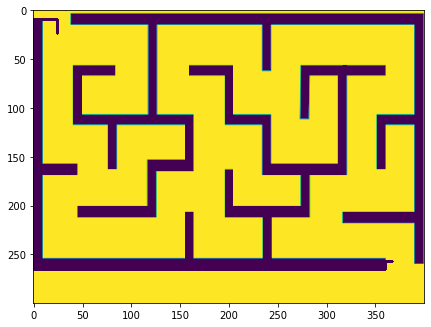

In [109]:
plt.figure(figsize = (7,7))
plt.imshow(maze)
plt.show()

In [68]:
mat

array([[ 1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  1,  1,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  1,  0,  0,  0],
       [ 0,  1,  1,  1,  1,  1,  0,  1,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  1,  1,  0,  1,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  1,  1,  1,  0,  1,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  1,  1,  1,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0,  0, -2,  0,  0]])

In [72]:
maze2 = mat *255
maze2

array([[ 255,  255,  255,  255,    0,    0,    0,    0,    0,    0,    0],
       [   0,  255,    0,  255,    0,    0,    0,    0,    0,    0,    0],
       [   0,  255,    0,    0,    0,  255,  255,  255,    0,    0,    0],
       [   0,  255,    0,    0,    0,  255,    0,  255,    0,    0,    0],
       [   0,  255,  255,  255,  255,  255,    0,  255,    0,    0,    0],
       [   0,  255,    0,    0,    0,    0,    0,  255,    0,    0,    0],
       [   0,  255,  255,    0,  255,    0,    0,  255,    0,    0,    0],
       [   0,    0,  255,  255,  255,    0,  255,  255,    0,    0,    0],
       [   0,    0,    0,    0,  255,    0,  255,  255,  255,    0,    0],
       [   0,    0,    0,  255,  255,    0,    0,    0, -510,    0,    0]])

In [91]:
maze2[9][8] = 255

In [92]:
maze2

array([[255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0],
       [  0, 255,   0, 255,   0,   0,   0,   0,   0,   0,   0],
       [  0, 255,   0,   0,   0, 255, 255, 255,   0,   0,   0],
       [  0, 255,   0,   0,   0, 255,   0, 255,   0,   0,   0],
       [  0, 255, 255, 255, 255, 255,   0, 255,   0,   0,   0],
       [  0, 255,   0,   0,   0,   0,   0, 255,   0,   0,   0],
       [  0, 255, 255,   0, 255,   0,   0, 255,   0,   0,   0],
       [  0,   0, 255, 255, 255,   0, 255, 255,   0,   0,   0],
       [  0,   0,   0,   0, 255,   0, 255, 255, 255,   0,   0],
       [  0,   0,   0, 255, 255,   0,   0,   0, 255,   0,   0]])

In [93]:
path2 = find_shortest_path_bfs(maze2, 0,0,8,9)

rows 10
cols 11
visiting 0 0
visiting 1 0
visiting 1 1
visiting 0 0
visiting 2 0
visiting 1 2
visiting 3 0
visiting 1 3
visiting 3 1
visiting 1 4
visiting 1 5
visiting 2 4
visiting 1 6
visiting 3 4
visiting 2 6
visiting 4 4
visiting 2 7
visiting 5 4
visiting 3 7
visiting 5 3
visiting 4 7
visiting 5 2
visiting 4 6
visiting 4 8
visiting 6 2
visiting 4 9
visiting 7 2
visiting 3 9
visiting 7 3
visiting 7 4
visiting 7 5
visiting 7 6
visiting 7 7
visiting 7 8
visiting 6 7
visiting 6 8
visiting 8 8
found


In [94]:
print(path2)

[(8, 9), (8, 9), (8, 8), (7, 8), (7, 7), (7, 6), (7, 5), (7, 4), (7, 3), (7, 2), (6, 2), (5, 2), (5, 3), (5, 4), (4, 4), (3, 4), (2, 4), (1, 4), (1, 3), (1, 2), (1, 1), (1, 0)]


In [99]:
drawPath(maze2, path2)
plt.figure(figsize = (7,7))
plt.imshow(maze2)
plt.show()

TypeError: Expected Ptr<cv::UMat> for argument 'img'

In [110]:
def drawPath(img,path, thickness=2):
    '''path is a list of (x,y) tuples'''
    x0,y0=path[0]
    for vertex in path[1:]:
        print(vertex)
        x1,y1=vertex
        cv2.line(img,(x0,y0),(x1,y1),(0,0,255),thickness)
        x0,y0=vertex